# Research Paper Figures & Visualizations (Final)

This notebook generates high-quality, IEEE-format figures for the research paper:
**"Semantic Symptom Encoding with User-in-Loop Confirmation for Disease Prediction"**

## Figures Generated:
1. **System Architecture** - SVG diagram of the pipeline
2. **Classification Performance** - 5-Fold CV results
3. **Pipeline Comparison** - All-mpnet vs Multi-QA (Best Model Selection)
4. **Threshold Sensitivity** - Heatmap of hyperparameter sweep
5. **Encoder Evaluation** - Paraphrase matching metrics
6. **Ablation Study** - Component contributions
7. **Symptom Embeddings (t-SNE)** - Semantic clustering of symptoms
8. **Class Imbalance Defense** - F1 vs Sample Size
9. **Confusion Matrix** - Misclassification heatmap
10. **ROC Curves** - Diagnostic performance for top diseases

---
**Data Sources**:
- `notebooks/figures/rigorous_eval_results.json` (CV & Encoder Eval)
- `notebooks/figures/model_comparison_results.json` (Pipeline Comparison)
- Real-time inference for t-SNE and Confusion Matrix


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import sys

# Style Setup
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# Colors
COLORS = {
    'primary': '#2E86AB',     # Blue
    'secondary': '#A23B72',   # Magenta
    'success': '#28A745',     # Green
    'warning': '#F18F01',     # Orange
    'danger': '#C73E1D',      # Red
    'neutral': '#6C757D',     # Gray
    'purple': '#6F42C1',      # Purple
    'teal': '#20C997'         # Teal
}

# Paths
PROJECT_ROOT = Path("..").resolve()
FIGURES_DIR = Path("figures")
FIGURES_DIR.mkdir(exist_ok=True)
sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project Root: {PROJECT_ROOT}")
print(f"Figures Output: {FIGURES_DIR}")

Project Root: C:\Users\henry\Desktop\Programming\Python\Multimodal_Diagnosis
Figures Output: figures


## 1. Load Data & Models

In [2]:
# Load Rigorous Eval Results
with open(FIGURES_DIR / "rigorous_eval_results.json", "r") as f:
    rigorous_results = json.load(f)

# Load Model Comparison Results
model_comp_path = FIGURES_DIR / "model_comparison_results.json"
if model_comp_path.exists():
    with open(model_comp_path, "r") as f:
        model_comp_results = json.load(f)
else:
    print("Warning: model_comparison_results.json not found. Using fallback.")
    model_comp_results = {}


## 2. System Architecture Diagram

c:\Users\henry\.conda\envs\multimodal\lib\site-packages\matplotlib\patches.py:2975: RuntimeWarning: divide by zero encountered in scalar divide
  f2 = self.rad / d2
c:\Users\henry\.conda\envs\multimodal\lib\site-packages\matplotlib\patches.py:2978: RuntimeWarning: invalid value encountered in scalar multiply
  (cx + dx2 * f2, cy + dy2 * f2)])


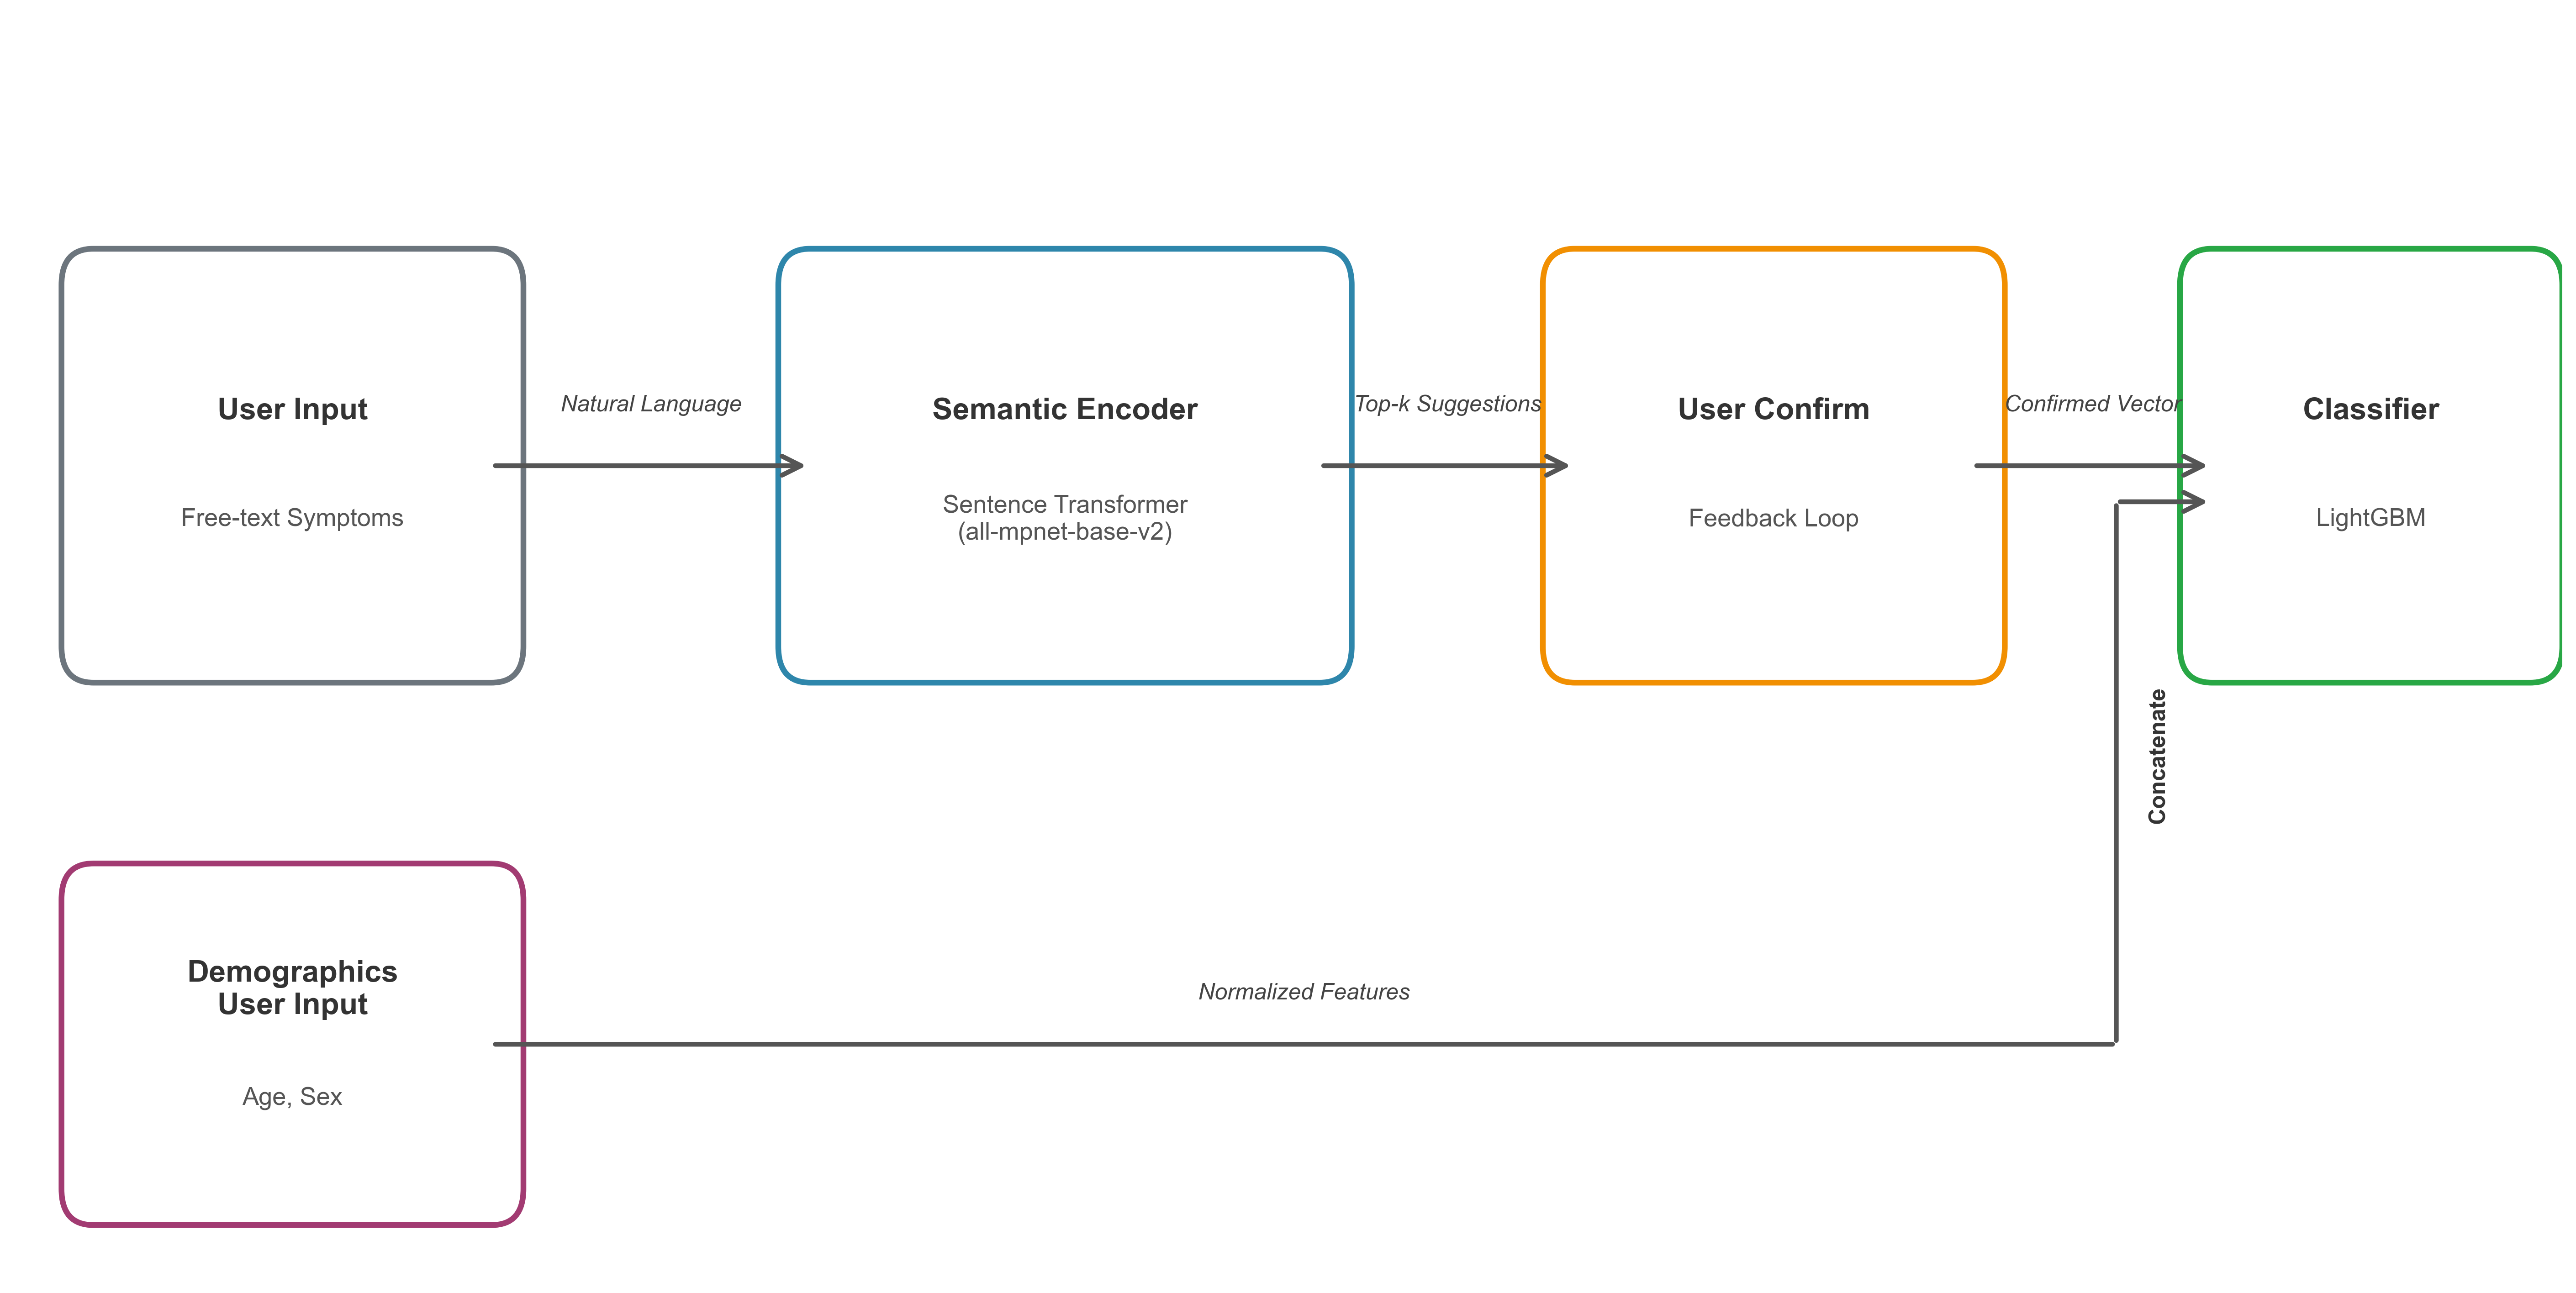

In [13]:
def draw_system_architecture():
    # Increased figure size for wider layout
    fig, ax = plt.subplots(figsize=(24, 12))
    # Extended x-limit to fit wider spacing
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 7) # Increased y-limit slightly
    ax.axis('off')

    def draw_box(x, y, w, h, color, text, subtext=""):
        rect = FancyBboxPatch((x, y), w, h, boxstyle='round,pad=0.2', 
                              facecolor='#ffffff', edgecolor=color, linewidth=3) # Thicker border
        ax.add_patch(rect)
        # Larger Fonts
        ax.text(x + w/2, y + h/2 + 0.3, text, ha='center', va='center', 
                fontsize=16, fontweight='bold', color='#333333') # Title 16
        if subtext:
            ax.text(x + w/2, y + h/2 - 0.3, subtext, ha='center', va='center', 
                    fontsize=13, color='#555555') # Subtext 13

    def draw_arrow(x1, y1, x2, y2, style='->', connectionstyle="arc3"):
        arrow = FancyArrowPatch((x1, y1), (x2, y2), 
                                arrowstyle=style, mutation_scale=25, 
                                color='#555555', linewidth=2.5, connectionstyle=connectionstyle)
        ax.add_patch(arrow)

    # Spacing variables for easy adjustment
    y_main = 3.5
    h_main = 2.0
    y_demo = 0.5
    h_demo = 1.6
    
    # X-coordinates with more gap
    x_input = 0.5
    w_input = 2.5
    
    x_encoder = 5.0  # Increased gap
    w_encoder = 3.2
    
    x_confirm = 9.8  # Increased gap
    w_confirm = 2.5
    
    x_class = 13.8   # Increased gap
    w_class = 2.0
    
    # Top Row
    draw_box(x_input, y_main, w_input, h_main, COLORS['neutral'], "User Input", "Free-text Symptoms")
    draw_box(x_encoder, y_main, w_encoder, h_main, COLORS['primary'], "Semantic Encoder", "Sentence Transformer\n(all-mpnet-base-v2)")
    draw_box(x_confirm, y_main, w_confirm, h_main, COLORS['warning'], "User Confirm", "Feedback Loop")
    draw_box(x_class, y_main, w_class, h_main, COLORS['success'], "Classifier", "LightGBM")
    
    # Bottom Row: Demographics
    draw_box(x_input, y_demo, w_input, h_demo, COLORS['secondary'], "Demographics\nUser Input", "Age, Sex")

    # Arrow Y-level (center of boxes + padding)
    y_arrow = y_main + h_main/2
    
    # 1. Input -> Encoder
    draw_arrow(x_input + w_input, y_arrow, x_encoder, y_arrow)
    ax.text((x_input + w_input + x_encoder)/2, y_arrow + 0.3, "Natural Language", 
            ha='center', fontsize=12, style='italic', color='#444444') # Label 12

    # 2. Encoder -> Confirm
    draw_arrow(x_encoder + w_encoder, y_arrow, x_confirm, y_arrow)
    ax.text((x_encoder + w_encoder + x_confirm)/2, y_arrow + 0.3, "Top-k Suggestions", 
            ha='center', fontsize=12, style='italic', color='#444444') # Label 12

    # 3. Confirm -> Classifier (Main Flow)
    draw_arrow(x_confirm + w_confirm, y_arrow, x_class, y_arrow)
    ax.text((x_confirm + w_confirm + x_class)/2, y_arrow + 0.3, "Confirmed Vector", 
            ha='center', fontsize=12, style='italic', color='#444444') # Label 12

    # 4. Demographics Path
    # Start: Right of Demographics
    start_x = x_input + w_input
    start_y = y_demo + h_demo/2
    
    # Target: Join point before Classifier
    # We want to merge clearly.
    # Go horizontally to just before classifier, then up.
    
    path_mid_x = x_class - 0.6 # A bit before the classifier box
    
    # Horizontal line across bottom
    draw_arrow(start_x, start_y, path_mid_x, start_y, style='-')
    ax.text((start_x + path_mid_x)/2, start_y + 0.25, "Normalized Features", 
            ha='center', fontsize=12, style='italic', color='#444444') # Label 12
    
    # Vertical line going UP
    draw_arrow(path_mid_x, start_y, path_mid_x, y_arrow - 0.2, style='-')
    
    # "Concatenate" text placed vertically along this line
    ax.text(path_mid_x + 0.2, (start_y + y_arrow)/2, "Concatenate", 
            ha='left', va='center', fontsize=12, fontweight='bold', color='#333333', rotation=90) # Label 12 Bold
    
    # Final merge arrow into the main flow arrow or box
    # Let's point it into the Classifier box input area
    draw_arrow(path_mid_x, y_arrow - 0.2, x_class, y_arrow - 0.2, style='->', connectionstyle="angle,angleA=0,angleB=90,rad=5")

#     plt.title("Figure 1: Semantic Symptom Encoding Pipeline", fontsize=24, pad=35, fontweight='bold') # Title 24
    
    plt.savefig(FIGURES_DIR / "fig1_system_architecture.png", dpi=300, bbox_inches='tight')
    plt.savefig(FIGURES_DIR / "fig1_system_architecture.svg", bbox_inches='tight')
    plt.show()

draw_system_architecture()

## 3. Classification Performance (5-Fold CV)

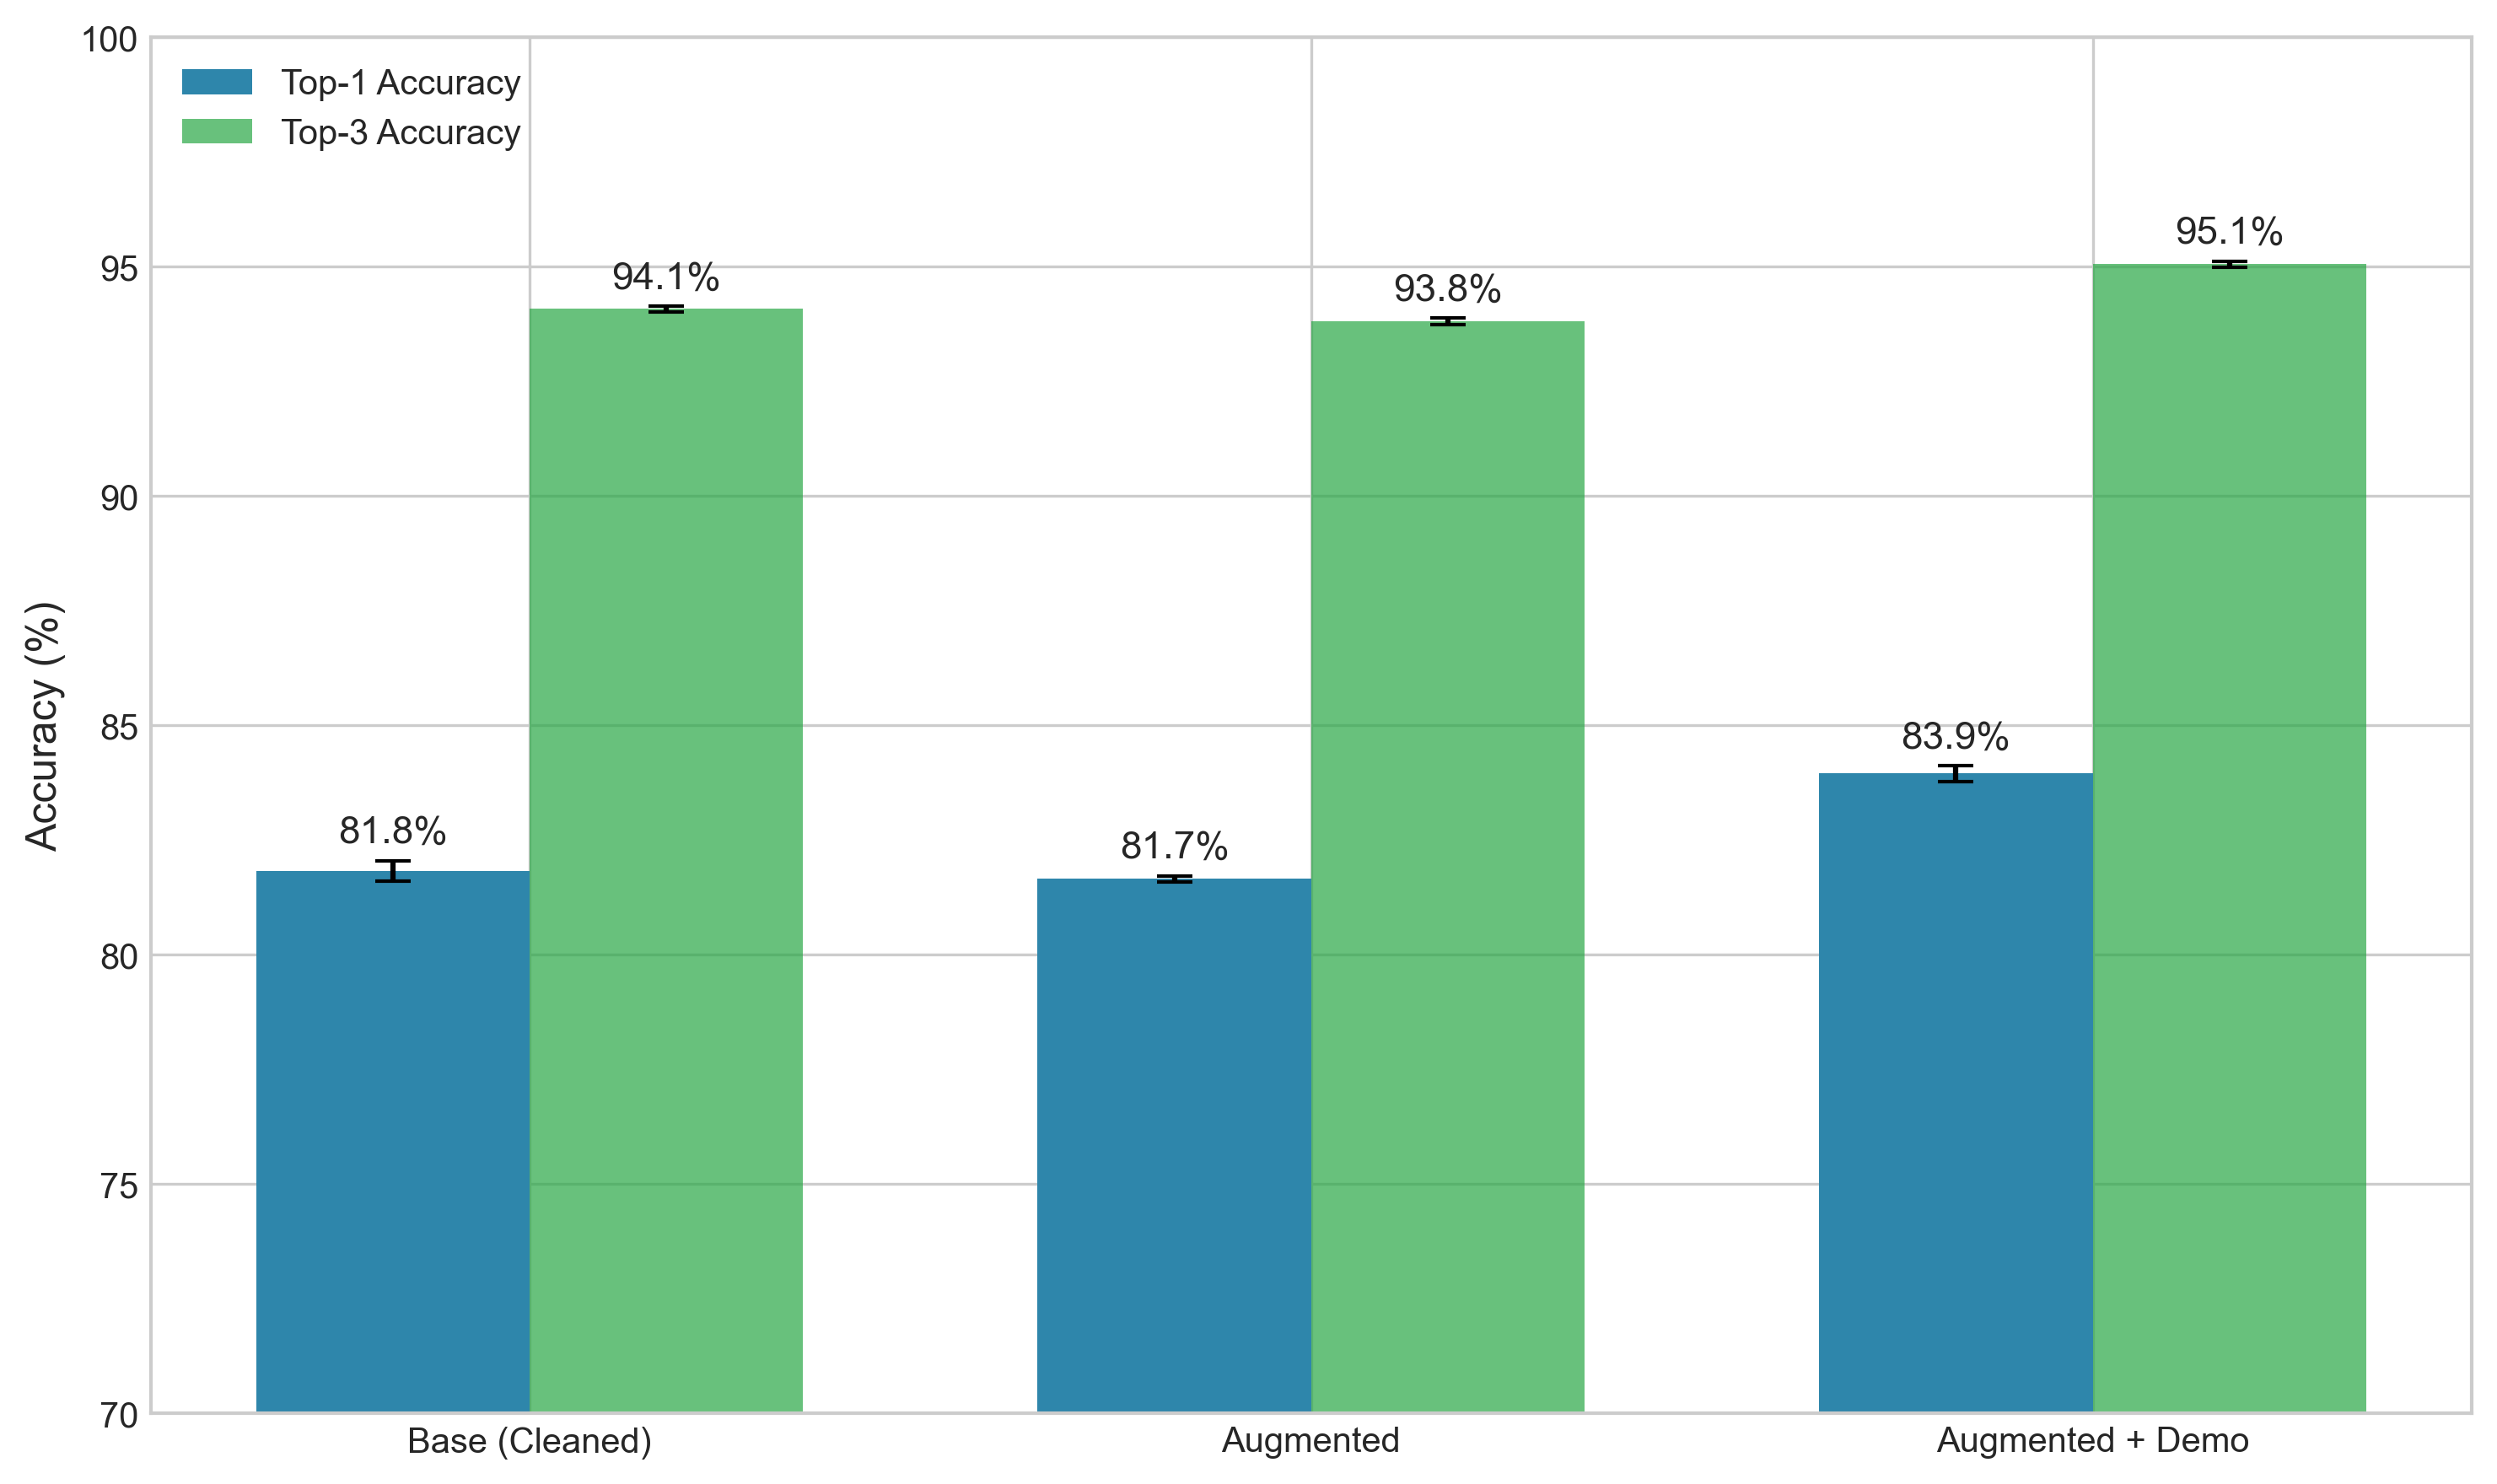

In [16]:
def plot_cv_performance():
    # Extract data
    configs = ['cv_real', 'cv_augmented', 'cv_augmented_demo']
    labels = ['Base (Cleaned)', 'Augmented', 'Augmented + Demo']
    
    top1 = [rigorous_results[c]['Top-1']['mean'] * 100 for c in configs]
    top1_err = [rigorous_results[c]['Top-1']['std'] * 100 for c in configs]
    top3 = [rigorous_results[c]['Top-3']['mean'] * 100 for c in configs]
    top3_err = [rigorous_results[c]['Top-3']['std'] * 100 for c in configs]
    
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, top1, width, label='Top-1 Accuracy', 
                    yerr=top1_err, color=COLORS['primary'], capsize=5)
    rects2 = ax.bar(x + width/2, top3, width, label='Top-3 Accuracy', 
                    yerr=top3_err, color=COLORS['success'], capsize=5, alpha=0.7)
    
    ax.set_ylabel('Accuracy (%)')
    # ax.set_title('Figure 2: Classification Performance (3-Fold CV)', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(70, 100)
    ax.legend(loc='upper left')
    ax.bar_label(rects1, fmt='%.1f%%', padding=3)
    ax.bar_label(rects2, fmt='%.1f%%', padding=3)
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig2_classification_performance.png")
    plt.savefig(FIGURES_DIR / "fig2_classification_performance.svg")
    plt.show()

plot_cv_performance()

## 4. Pipeline Comparison

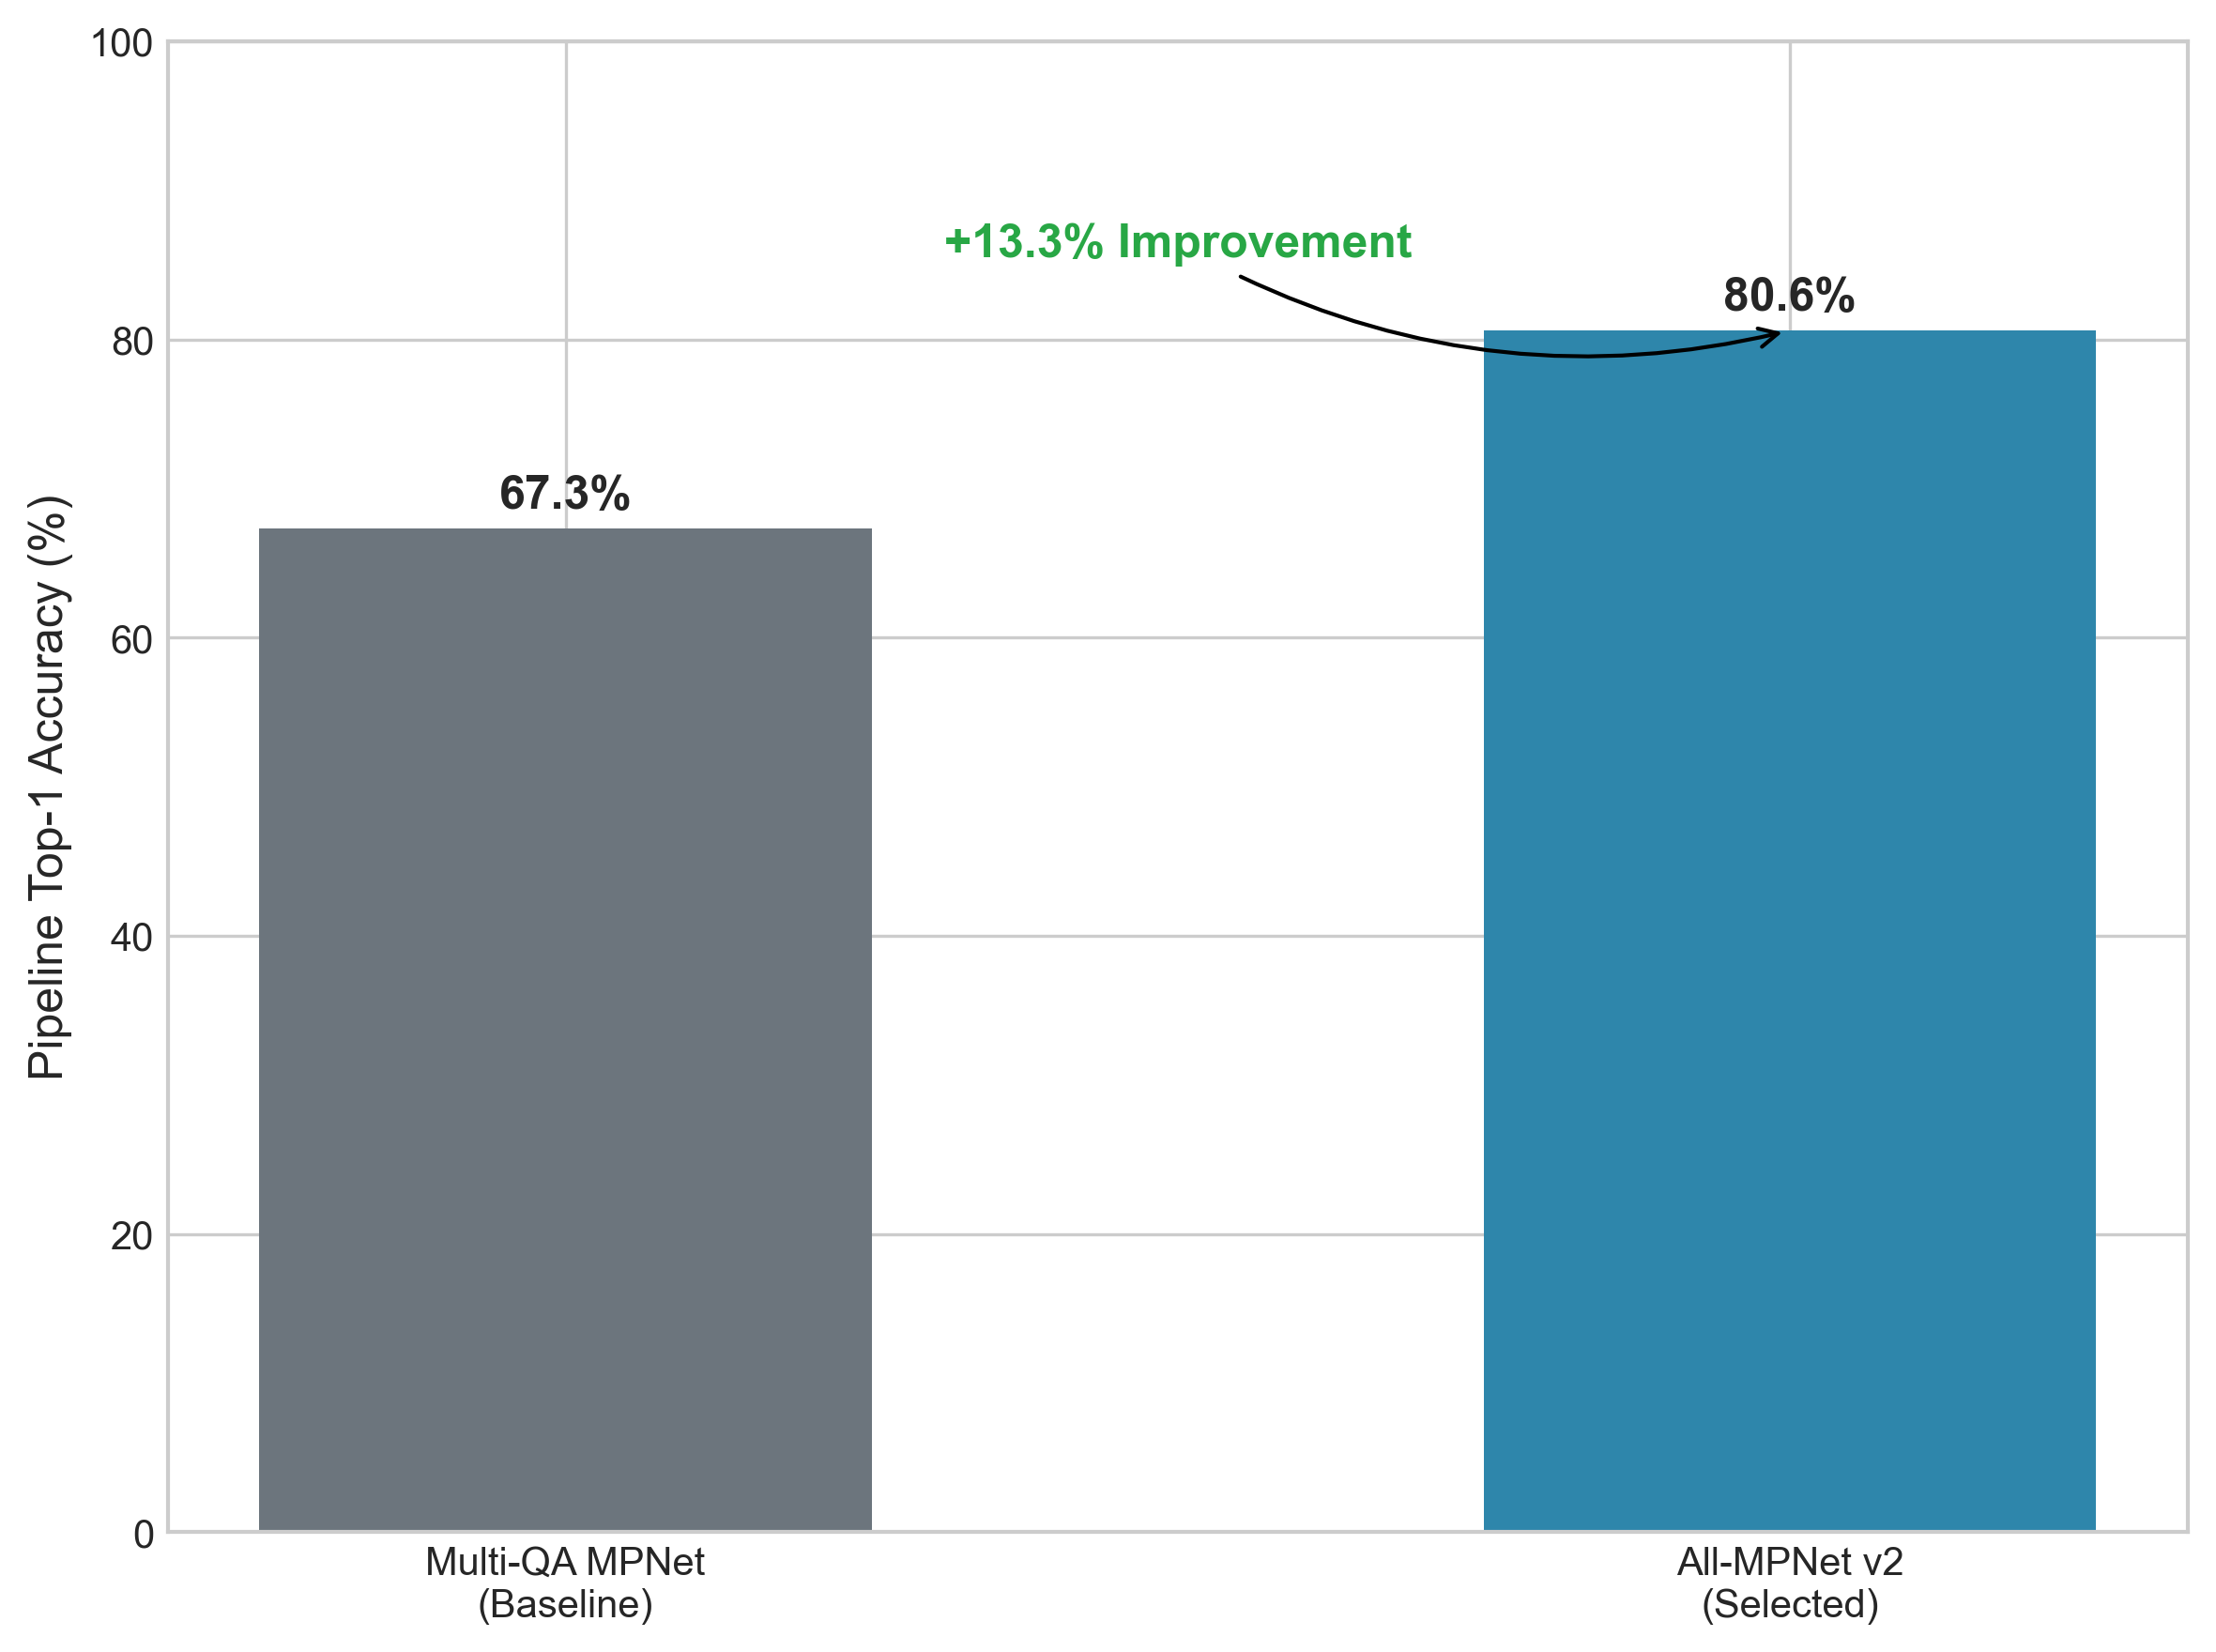

In [22]:
def plot_model_comparison():
    if not model_comp_results:
        return
    
    results = model_comp_results['all_results']
    mpnet = max([r for r in results if 'all-mpnet' in r['model'] and r['threshold'] == 0.15], key=lambda x: x['top1'])
    multiqa = max([r for r in results if 'multi-qa' in r['model'] and r['threshold'] == 0.15], key=lambda x: x['top1'])
    
    models = ['Multi-QA MPNet\n(Baseline)', 'All-MPNet v2\n(Selected)']
    scores = [multiqa['top1'] * 100, mpnet['top1'] * 100]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(models, scores, color=[COLORS['neutral'], COLORS['primary']], width=0.5)
    
    gain = scores[1] - scores[0]
    ax.annotate(f'+{gain:.1f}% Improvement',
                xy=(1, scores[1]), xytext=(0.5, scores[1] + 5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'),
                fontsize=12, fontweight='bold', color=COLORS['success'], ha='center')
    
    ax.set_ylabel('Pipeline Top-1 Accuracy (%)')
    ax.set_ylim(0, 100)
    # ax.set_title('Figure 3: Encoder Model Impact on Pipeline Accuracy')
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig3_model_comparison.png")
    plt.savefig(FIGURES_DIR / "fig3_model_comparison.svg")
    plt.show()

plot_model_comparison()

## 5. Threshold Sensitivity

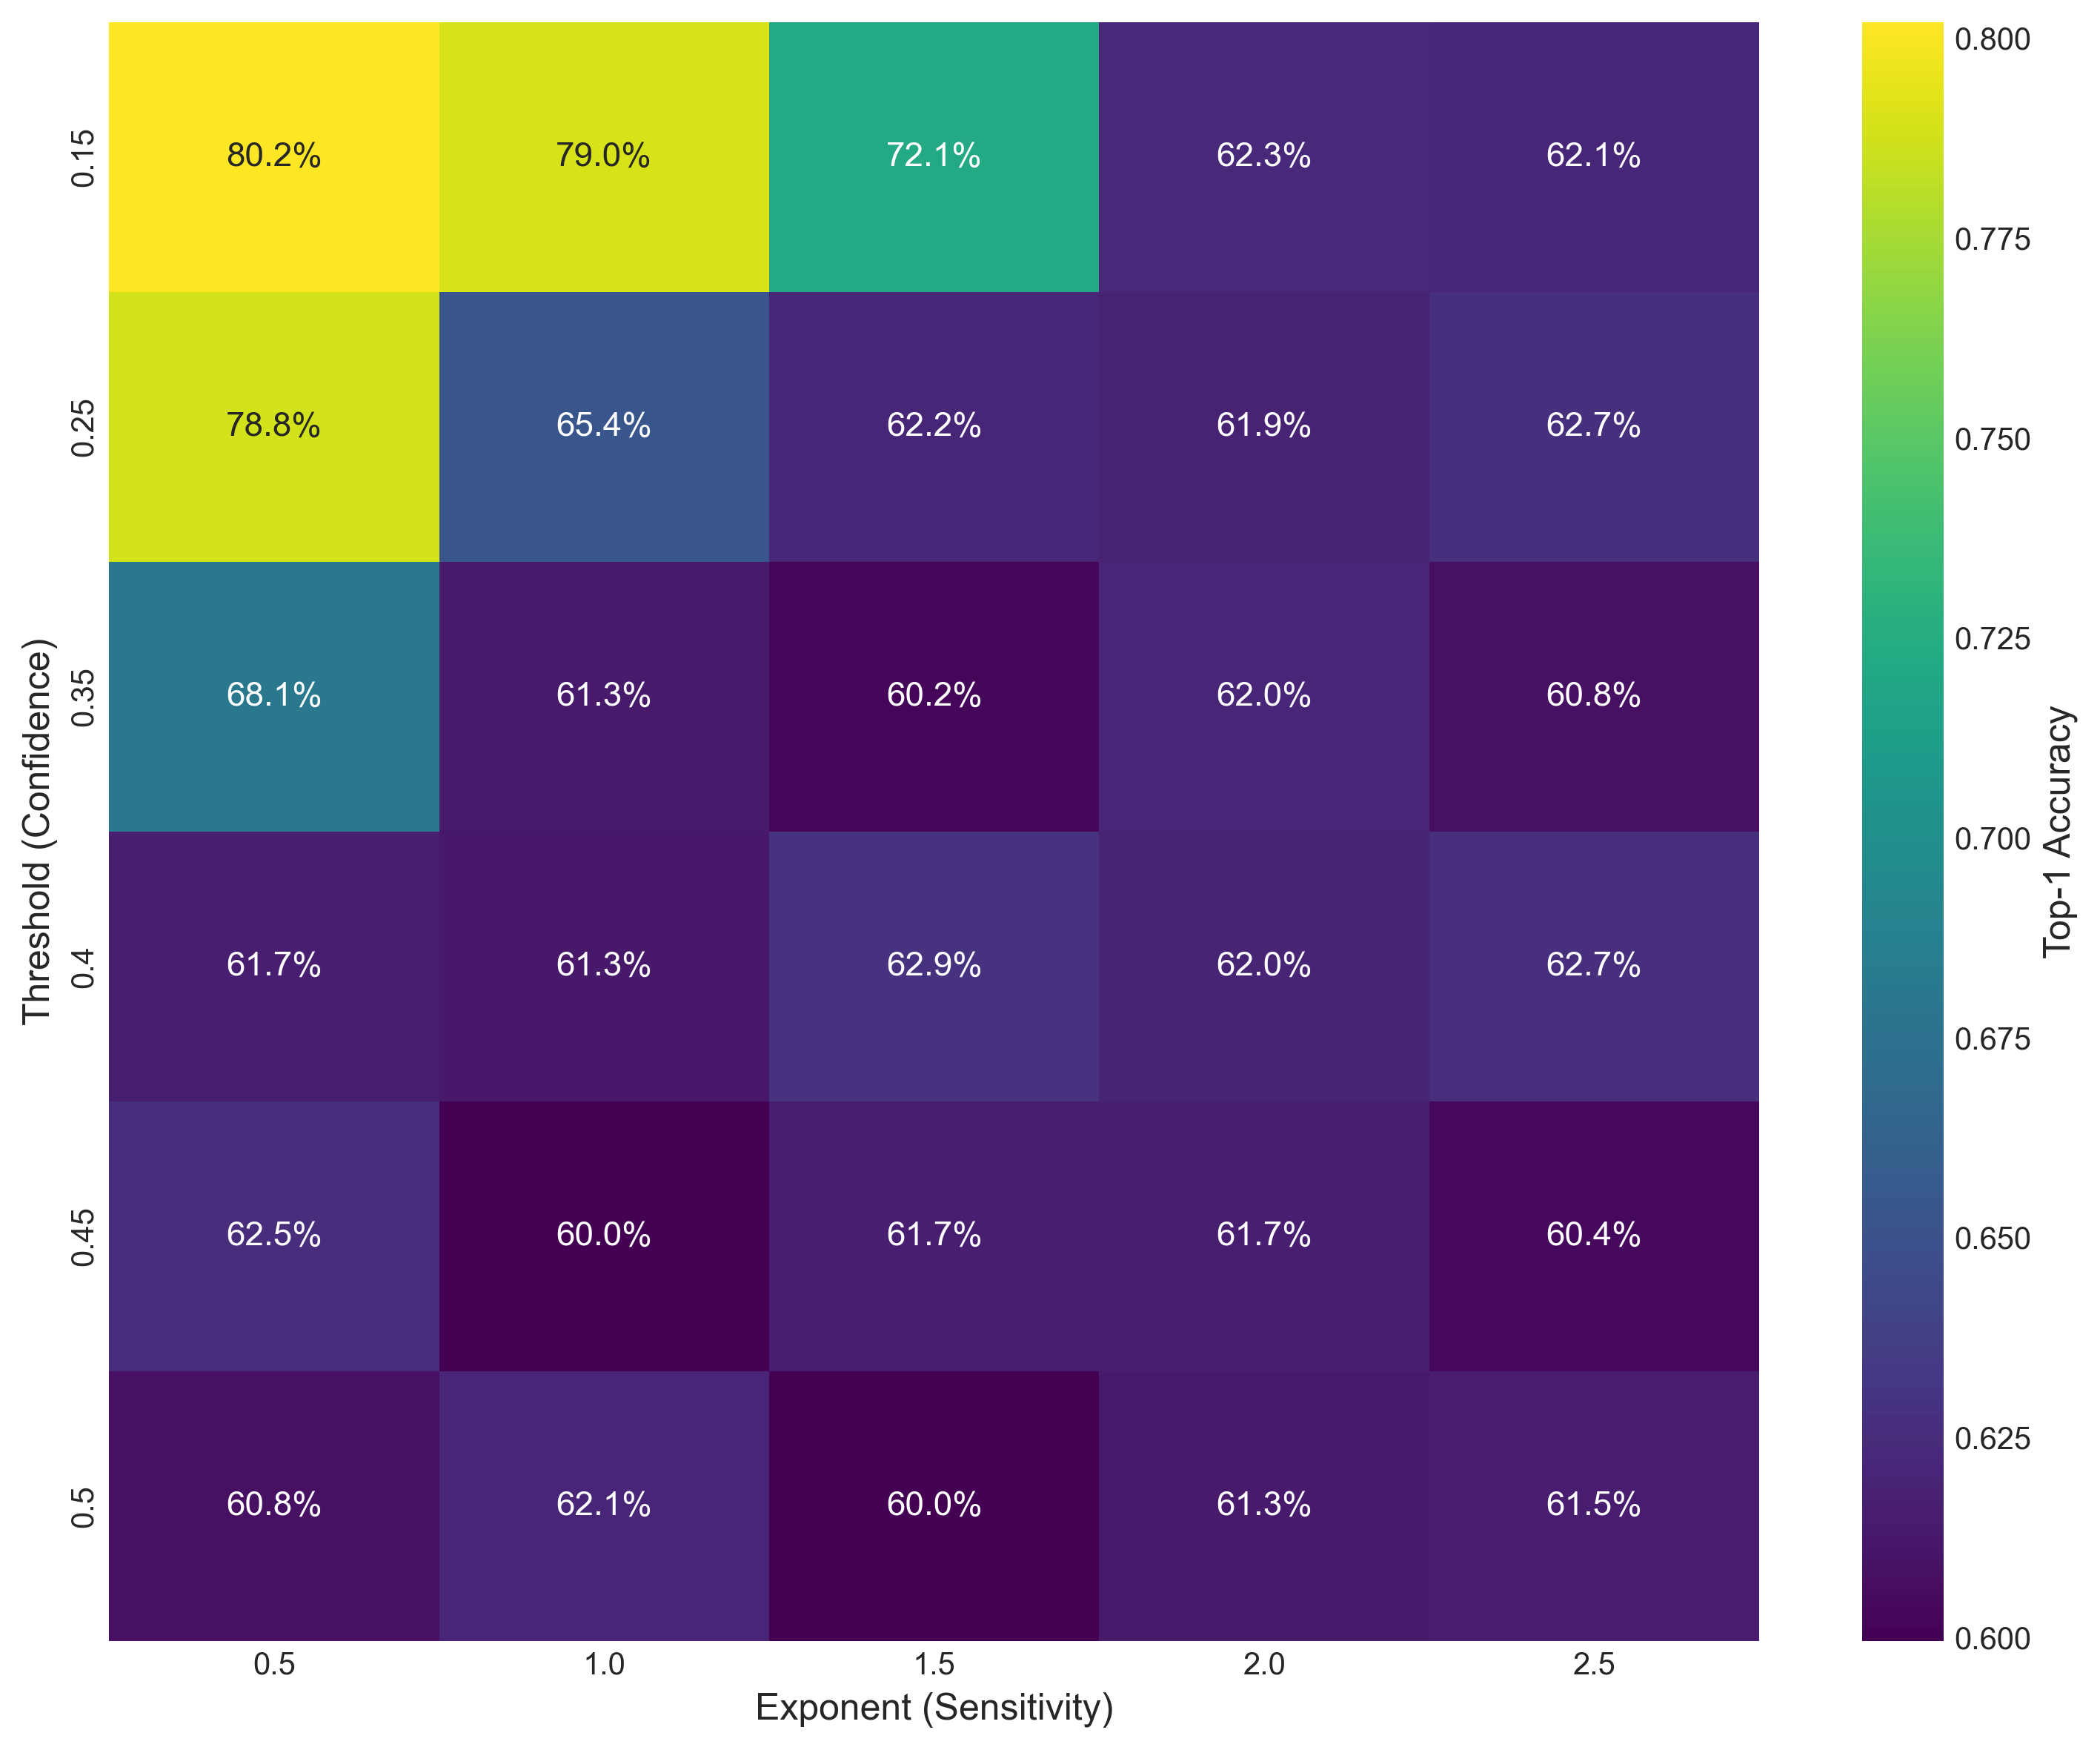

In [14]:
def plot_threshold_heatmap():
    sweep_data = rigorous_results.get('pipeline_user_in_loop', {}).get('sweep_results', [])
    if not sweep_data: return
        
    df_sweep = pd.DataFrame(sweep_data)
    pivot_table = df_sweep.pivot(index='threshold', columns='exponent', values='top1')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.1%', cmap='viridis',
                cbar_kws={'label': 'Top-1 Accuracy'})
    
    # plt.title('Threshold vs Exponent Sensitivity')
    plt.xlabel('Exponent (Sensitivity)')
    plt.ylabel('Threshold (Confidence)')
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig4_threshold_heatmap.png")
    plt.savefig(FIGURES_DIR / "fig4_threshold_heatmap.svg")
    plt.show()

plot_threshold_heatmap()

## 6. Encoder Eval & Ablation Study

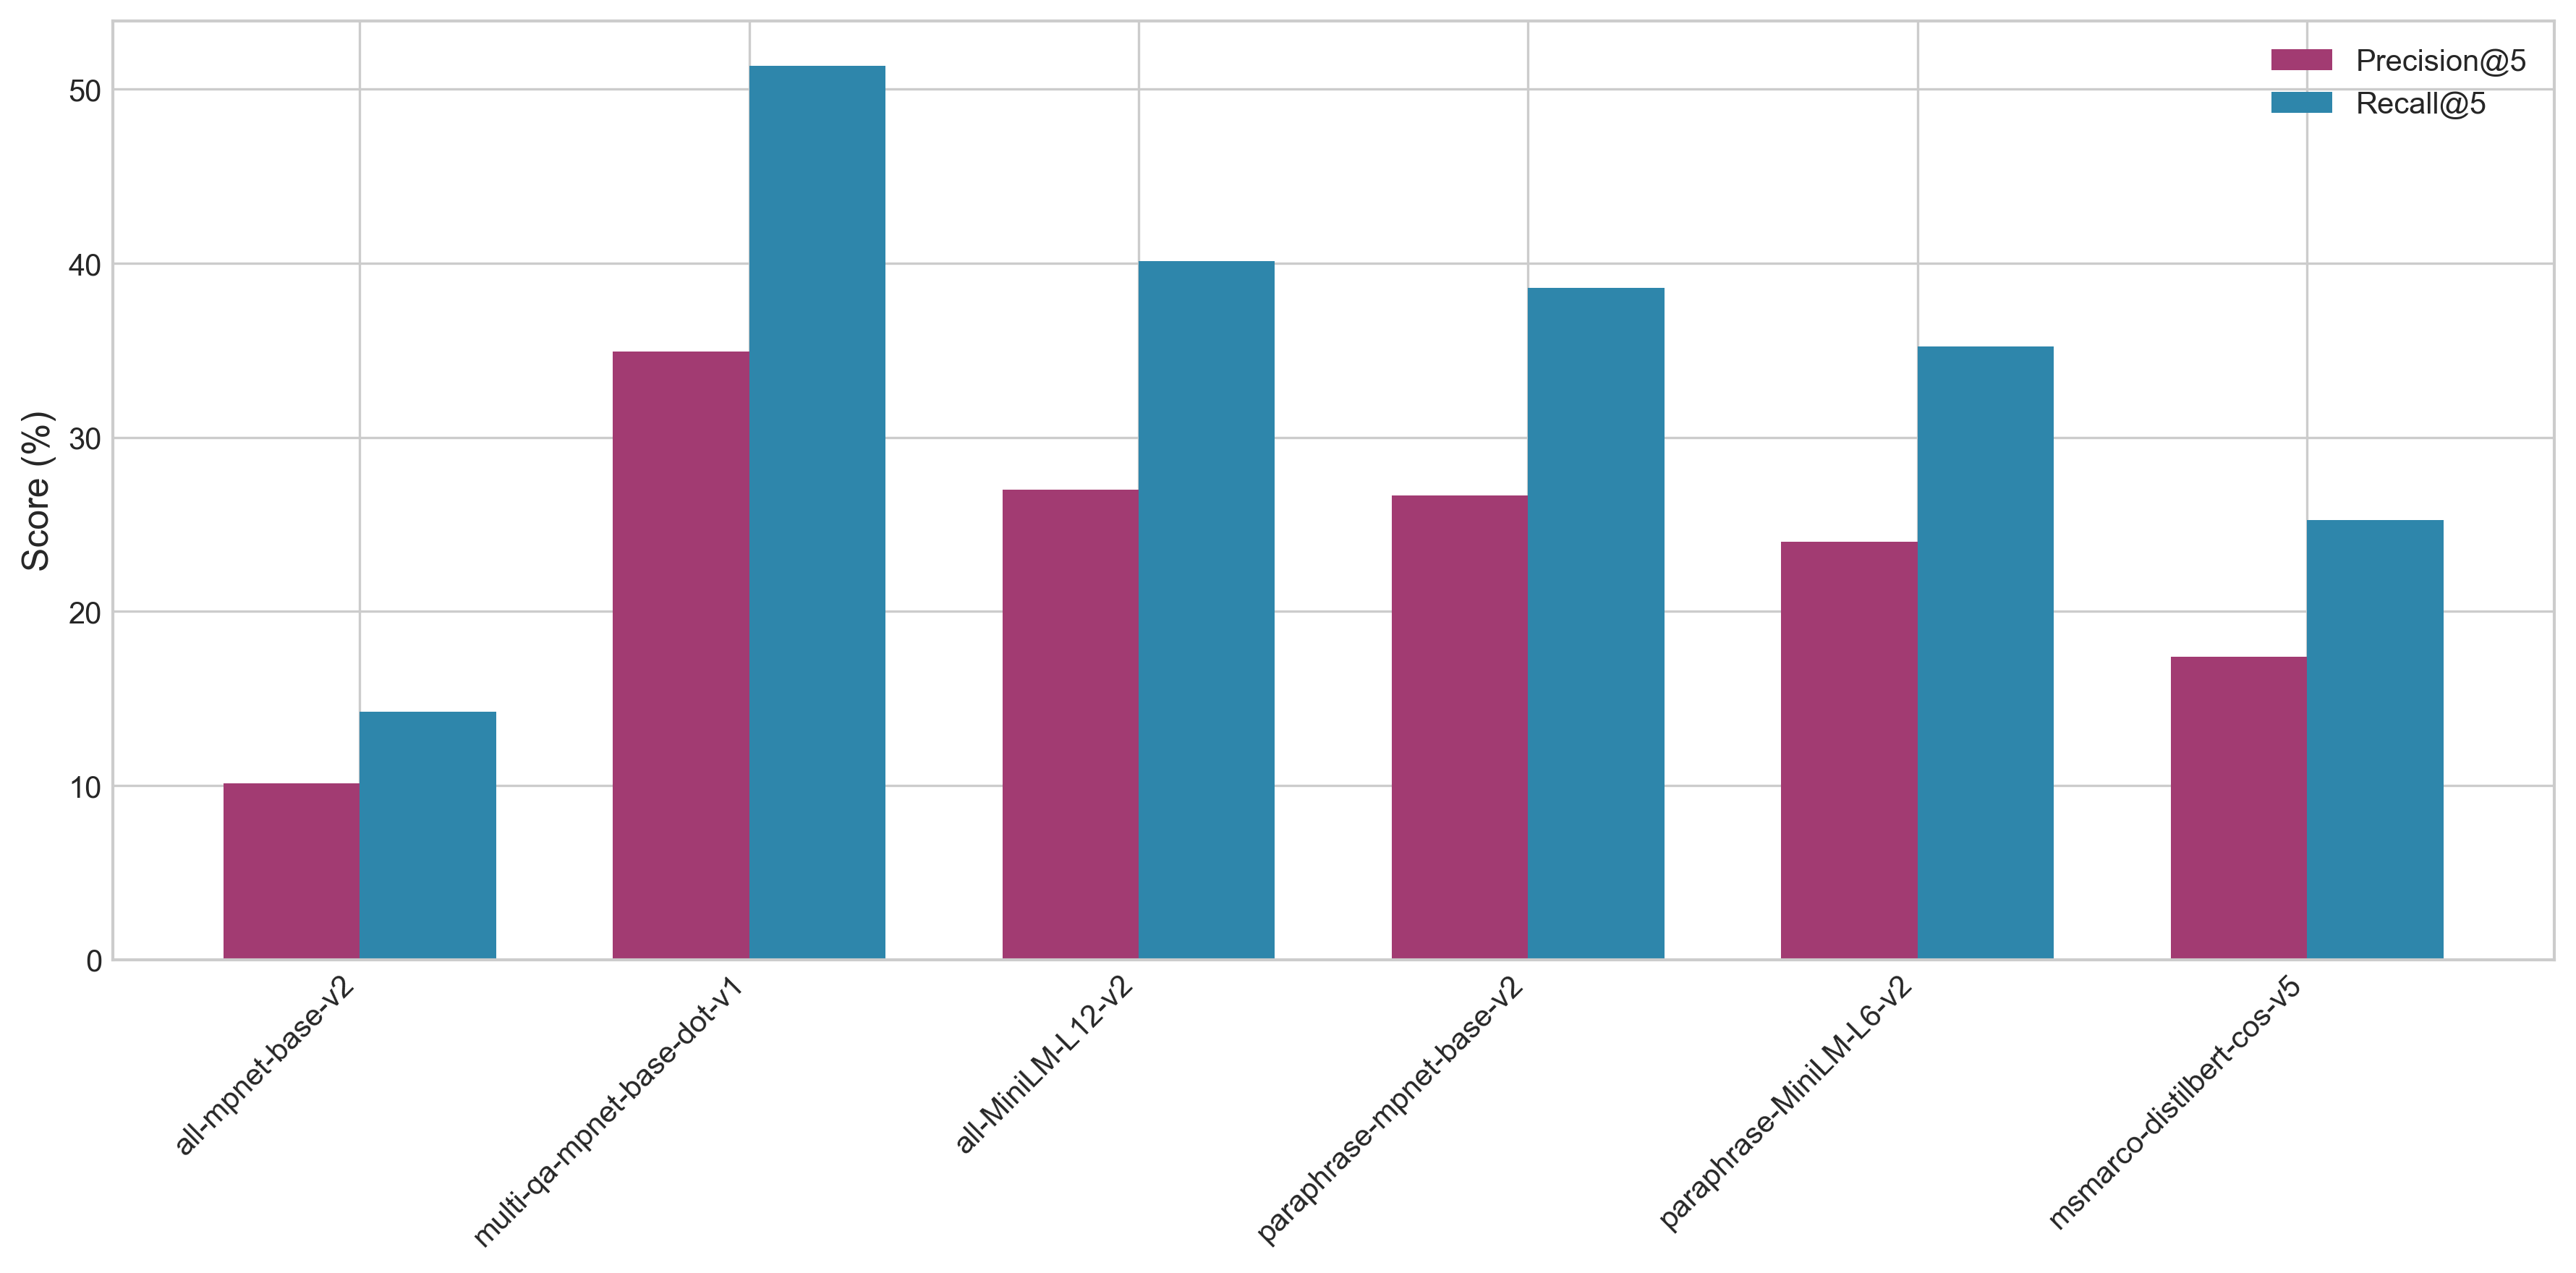

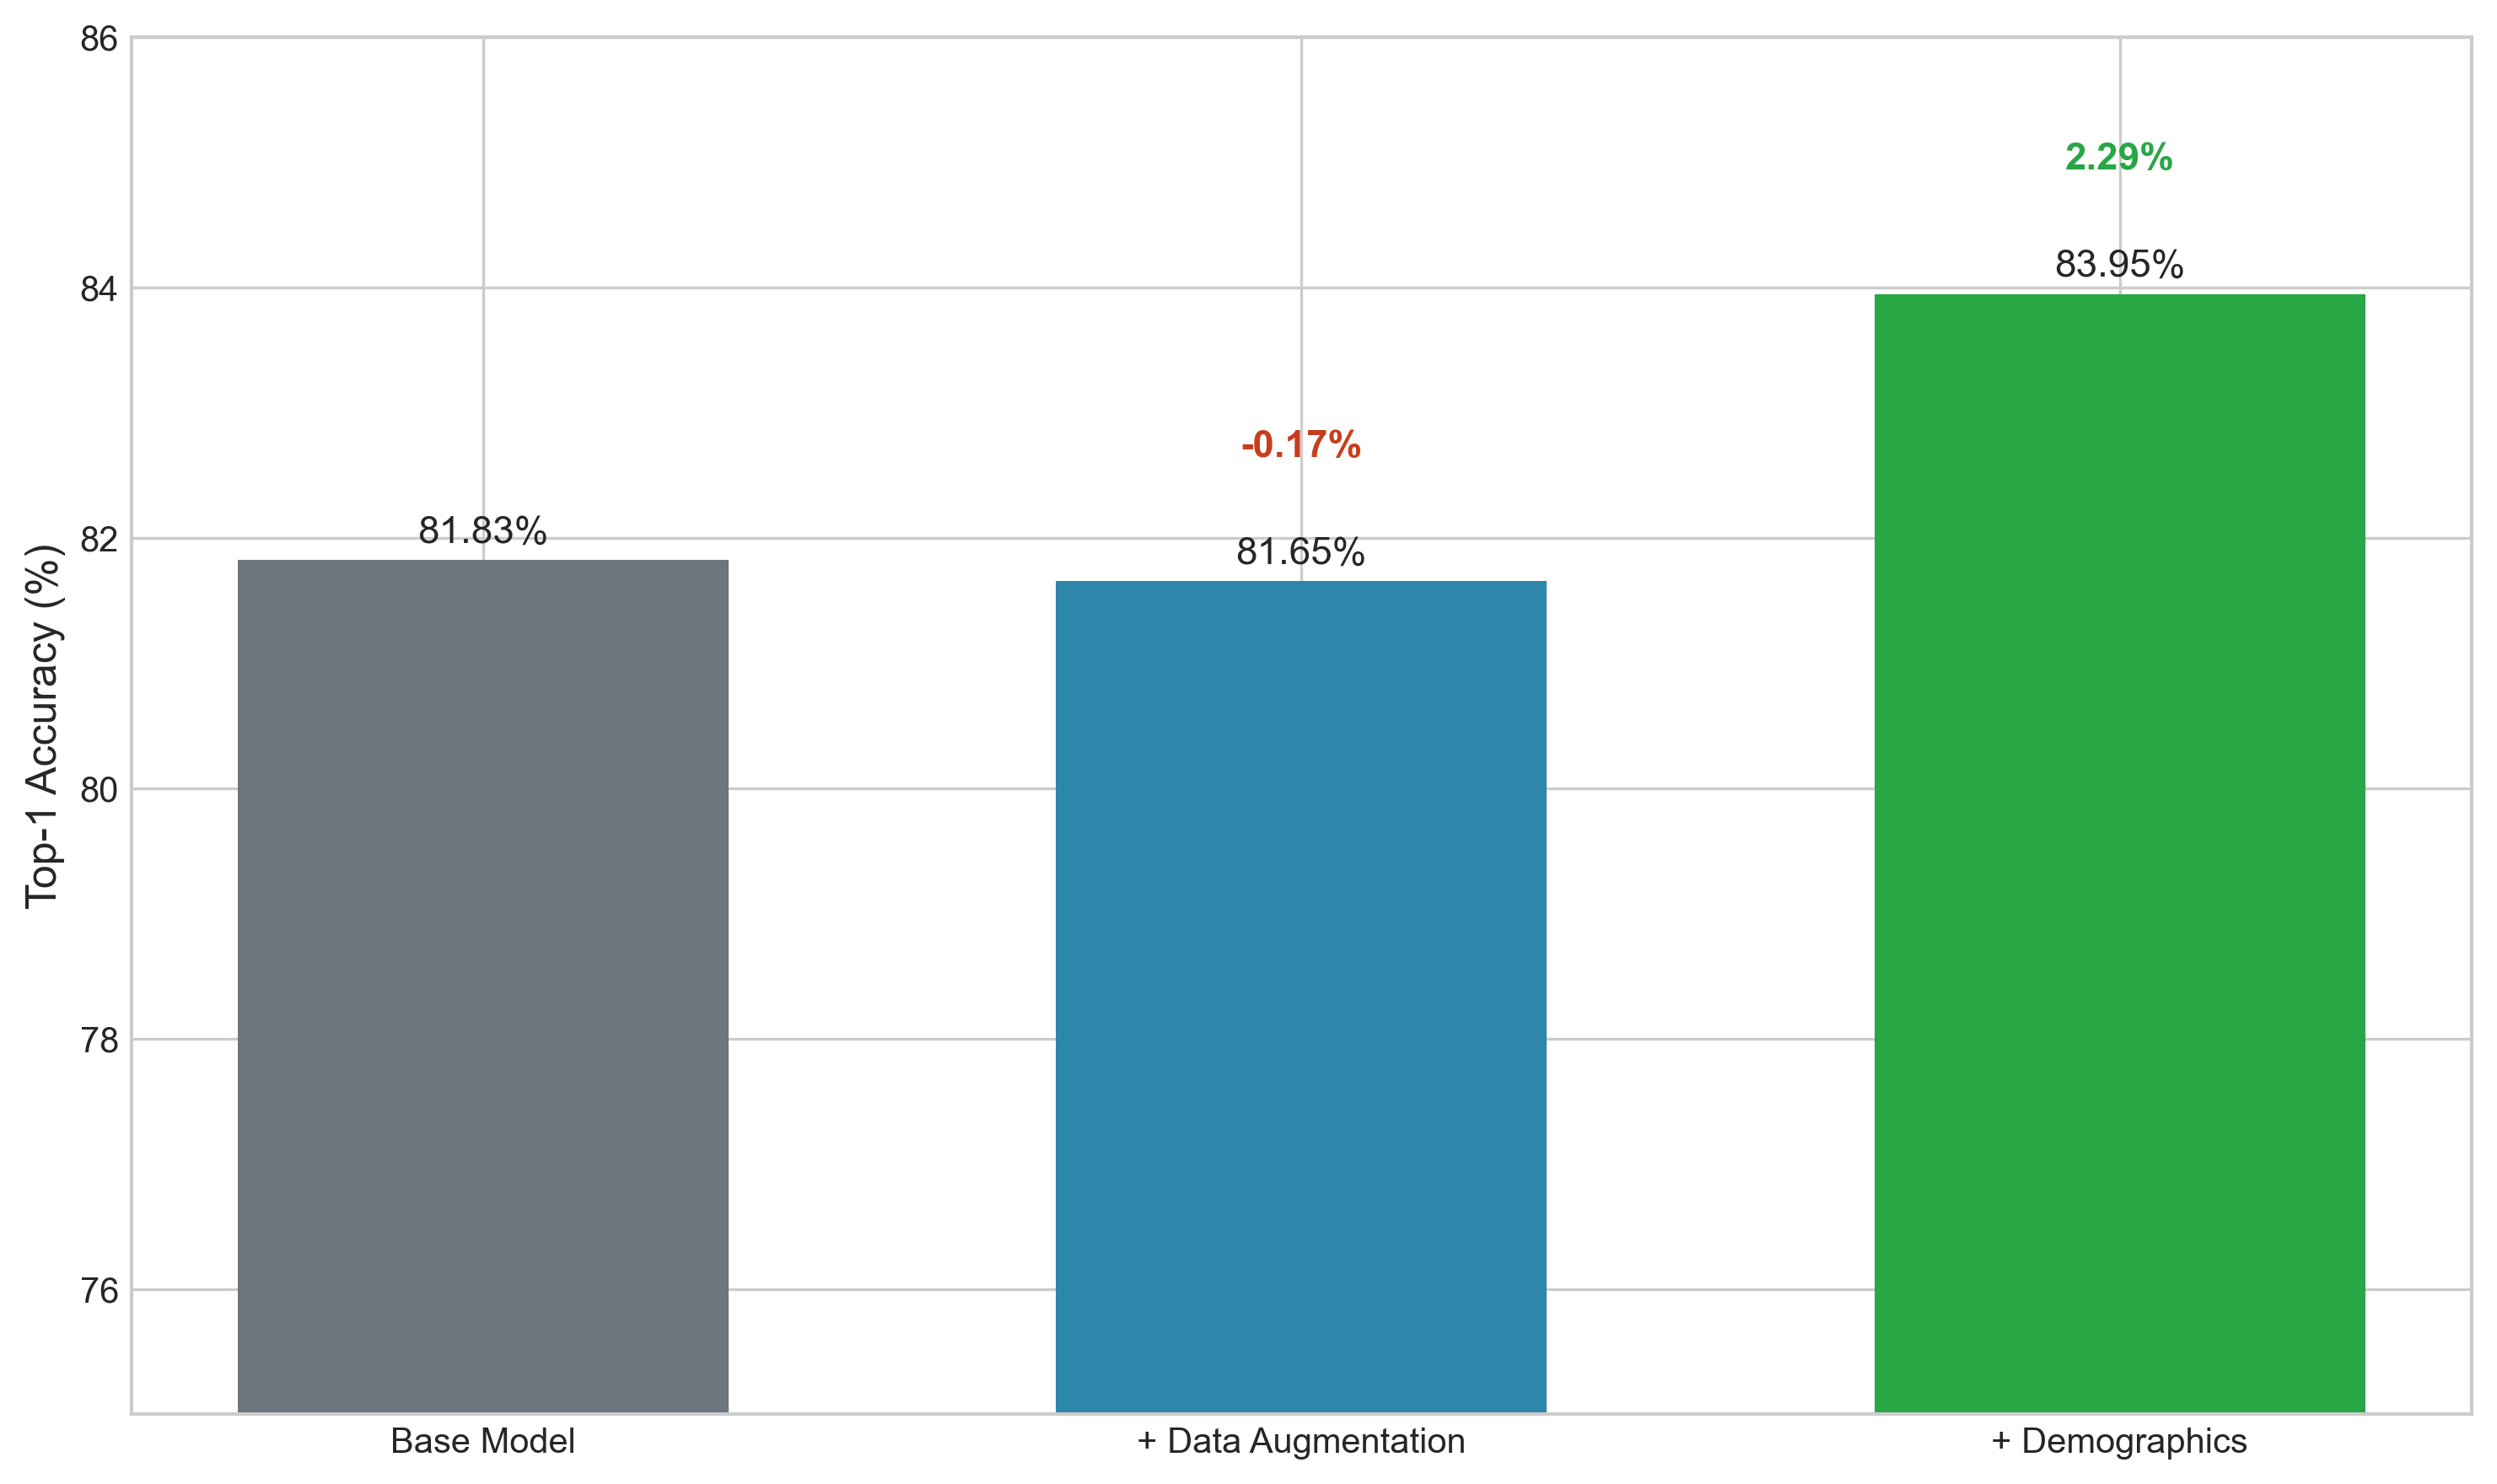

In [17]:
def plot_encoder_eval():
    data = rigorous_results.get('encoder_comparison', {}).get('all_results', [])
    
    models = [d['model'].replace('sentence-transformers/', '') for d in data]
    p5 = [d['P@5'] * 100 for d in data]
    r5 = [d['R@5'] * 100 for d in data]
    
    short_names = {
        'all-mpnet-base-v2': 'All-MPNet',
        'multi-qa-mpnet-base-dot-v1': 'Multi-QA',
        'all-MiniLM-L12-v2': 'MiniLM-L12',
        'paraphrase-mpnet-base-v2': 'Para-MPNet',
        'paraphrase-MiniLM-L6-v2': 'Para-MiniLM',
        'msmarco-distilbert-cos-v5': 'MS-MARCO'
    }
    labels = [short_names.get(m, m[:10]) for m in models]
    labels2 = [name for (name, shortname) in short_names.items()]
    x = np.arange(len(labels2))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, p5, width, label='Precision@5', color=COLORS['secondary'])
    ax.bar(x + width/2, r5, width, label='Recall@5', color=COLORS['primary'])
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels2, rotation=45, ha='right')
    ax.set_ylabel('Score (%)')
    # ax.set_title('Figure 5: Encoder Paraphrase Matching Performance')
    ax.legend()
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig5_encoder_eval.png")
    plt.savefig(FIGURES_DIR / "fig5_encoder_eval.svg")
    plt.show()

def plot_ablation_study():
    # Data from rigorous_results
    base = rigorous_results['cv_real']['Top-1']['mean'] * 100
    aug = rigorous_results['cv_augmented']['Top-1']['mean'] * 100
    demo = rigorous_results['cv_augmented_demo']['Top-1']['mean'] * 100
    
    components = ['Base Model', '+ Data Augmentation', '+ Demographics']
    scores = [base, aug, demo]
    gains = [0, aug-base, demo-aug]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(components, scores, color=[COLORS['neutral'], COLORS['primary'], COLORS['success']], width=0.6)
    
    # Annotate gains
    for i, (score, gain) in enumerate(zip(scores, gains)):
        if i > 0:
            ax.annotate(f'{gain:.2f}%', 
                        xy=(i, score), xytext=(i, score + 1),
                        ha='center', color=COLORS['success' if gain > 0 else 'danger'], 
                        fontweight='bold')

    ax.set_ylabel('Top-1 Accuracy (%)')
    ax.set_ylim(75, 86)
    # ax.set_title('Figure 8: Ablation Study - Component Contribution')
    ax.bar_label(bars, fmt='%.2f%%', padding=3)
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig8_ablation_study.png")
    plt.savefig(FIGURES_DIR / "fig8_ablation_study.svg")
    plt.show()

plot_encoder_eval()
plot_ablation_study()

## 7. Symptom Embeddings (t-SNE)

Loading Encoder for t-SNE...
[Encoder] Loading model: all-mpnet-base-v2
[Encoder] Loaded cached symptom embeddings
[Encoder] Initialized with 456 symptoms
Computing t-SNE...


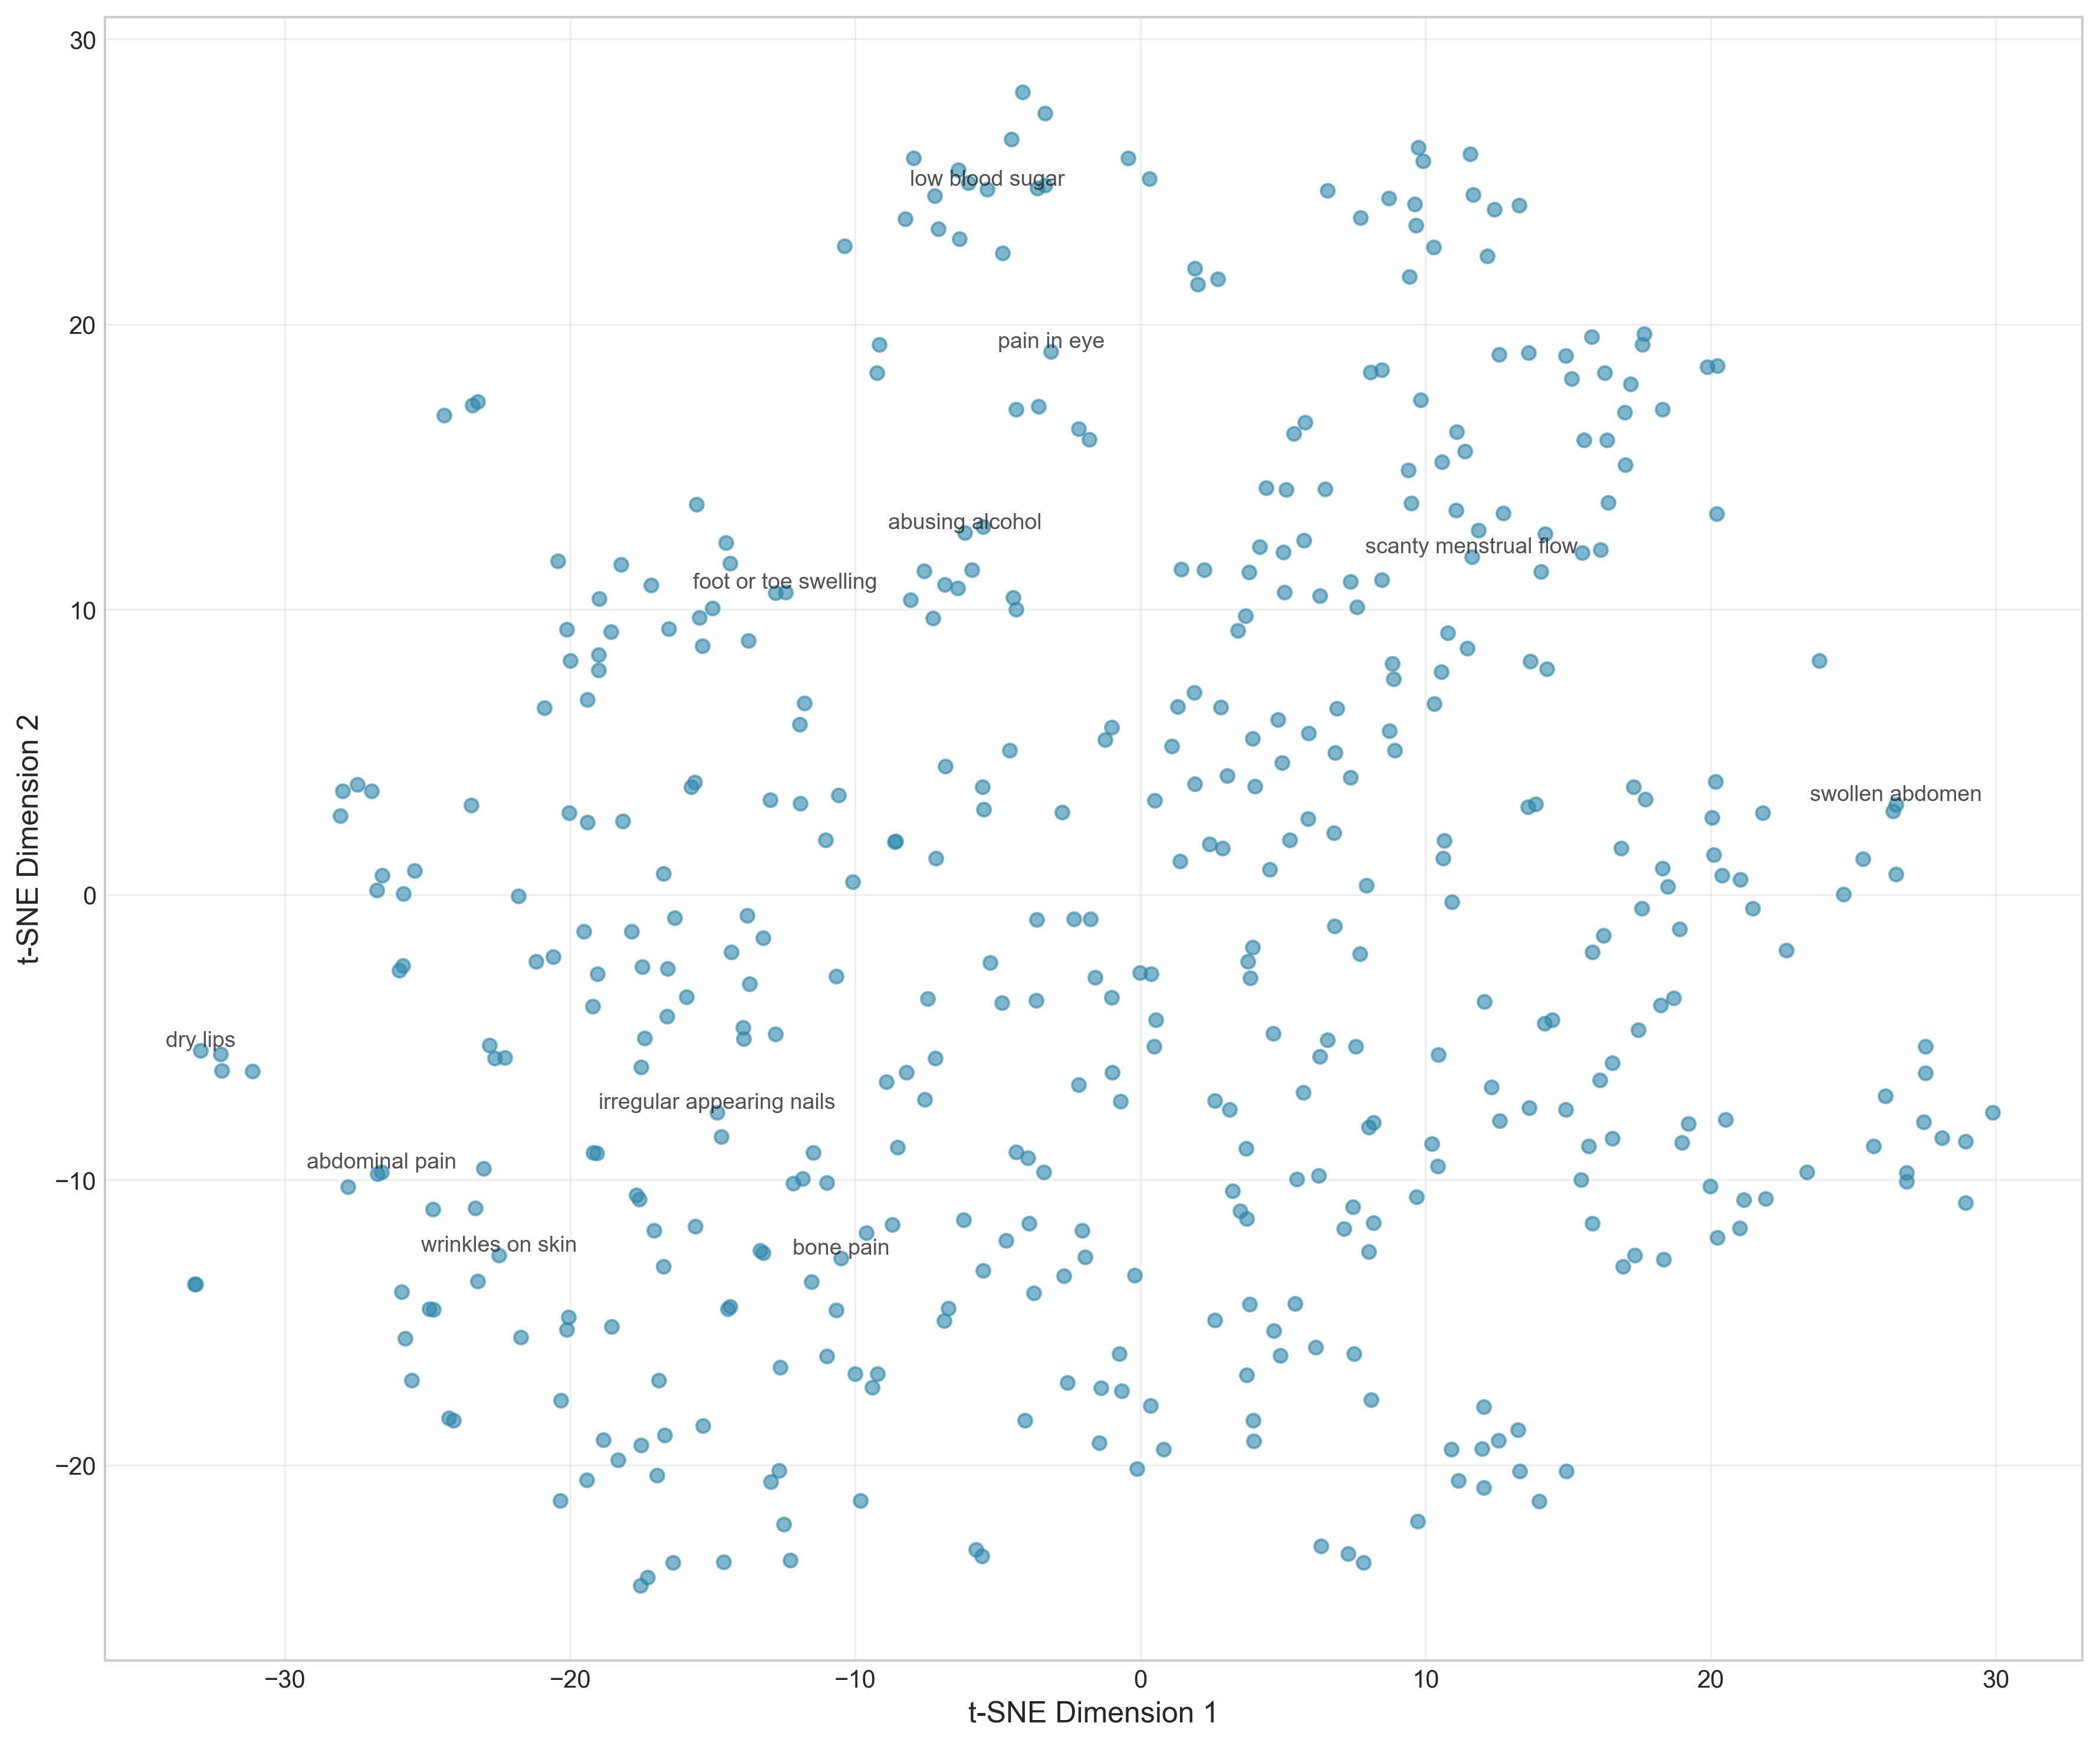

In [18]:
def plot_symptom_tsne():
    try:
        from models.architectures.semantic_symptom_encoder import SemanticSymptomEncoder
    except ImportError:
        print("Could not import Encoder. Skipping t-SNE.")
        return

    print("Loading Encoder for t-SNE...")
    encoder = SemanticSymptomEncoder(model_name="all-mpnet-base-v2", device="cpu")
    embeddings = encoder.symptom_embeddings
    symptoms = encoder.symptoms
    
    print("Computing t-SNE...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
    X_embedded = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(12, 10))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.6, c=COLORS['primary'], s=30)
    
    # Label some interesting symptoms
    # Pick indices for diverse symptoms
    important_indices = [0, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450]
    for i in important_indices:
        if i < len(symptoms):
            plt.annotate(symptoms[i], (X_embedded[i, 0], X_embedded[i, 1]), 
                         fontsize=9, alpha=0.8, ha='center', va='bottom')
            
    # plt.title('Figure 9: t-SNE Visualization of Symptom Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig9_symptom_tsne.png")
    plt.savefig(FIGURES_DIR / "fig9_symptom_tsne.svg")
    plt.show()

plot_symptom_tsne()

## 8. Confusion Matrix & ROC (Live Training)

Loading data for Category Model Evaluation...
Splitting data...
Training SymptomCategoryClassifier on 14 categories...
Training SymptomCategoryClassifier with shape (166014, 456)
Generating predictions...
Plotting Confusion Matrix...


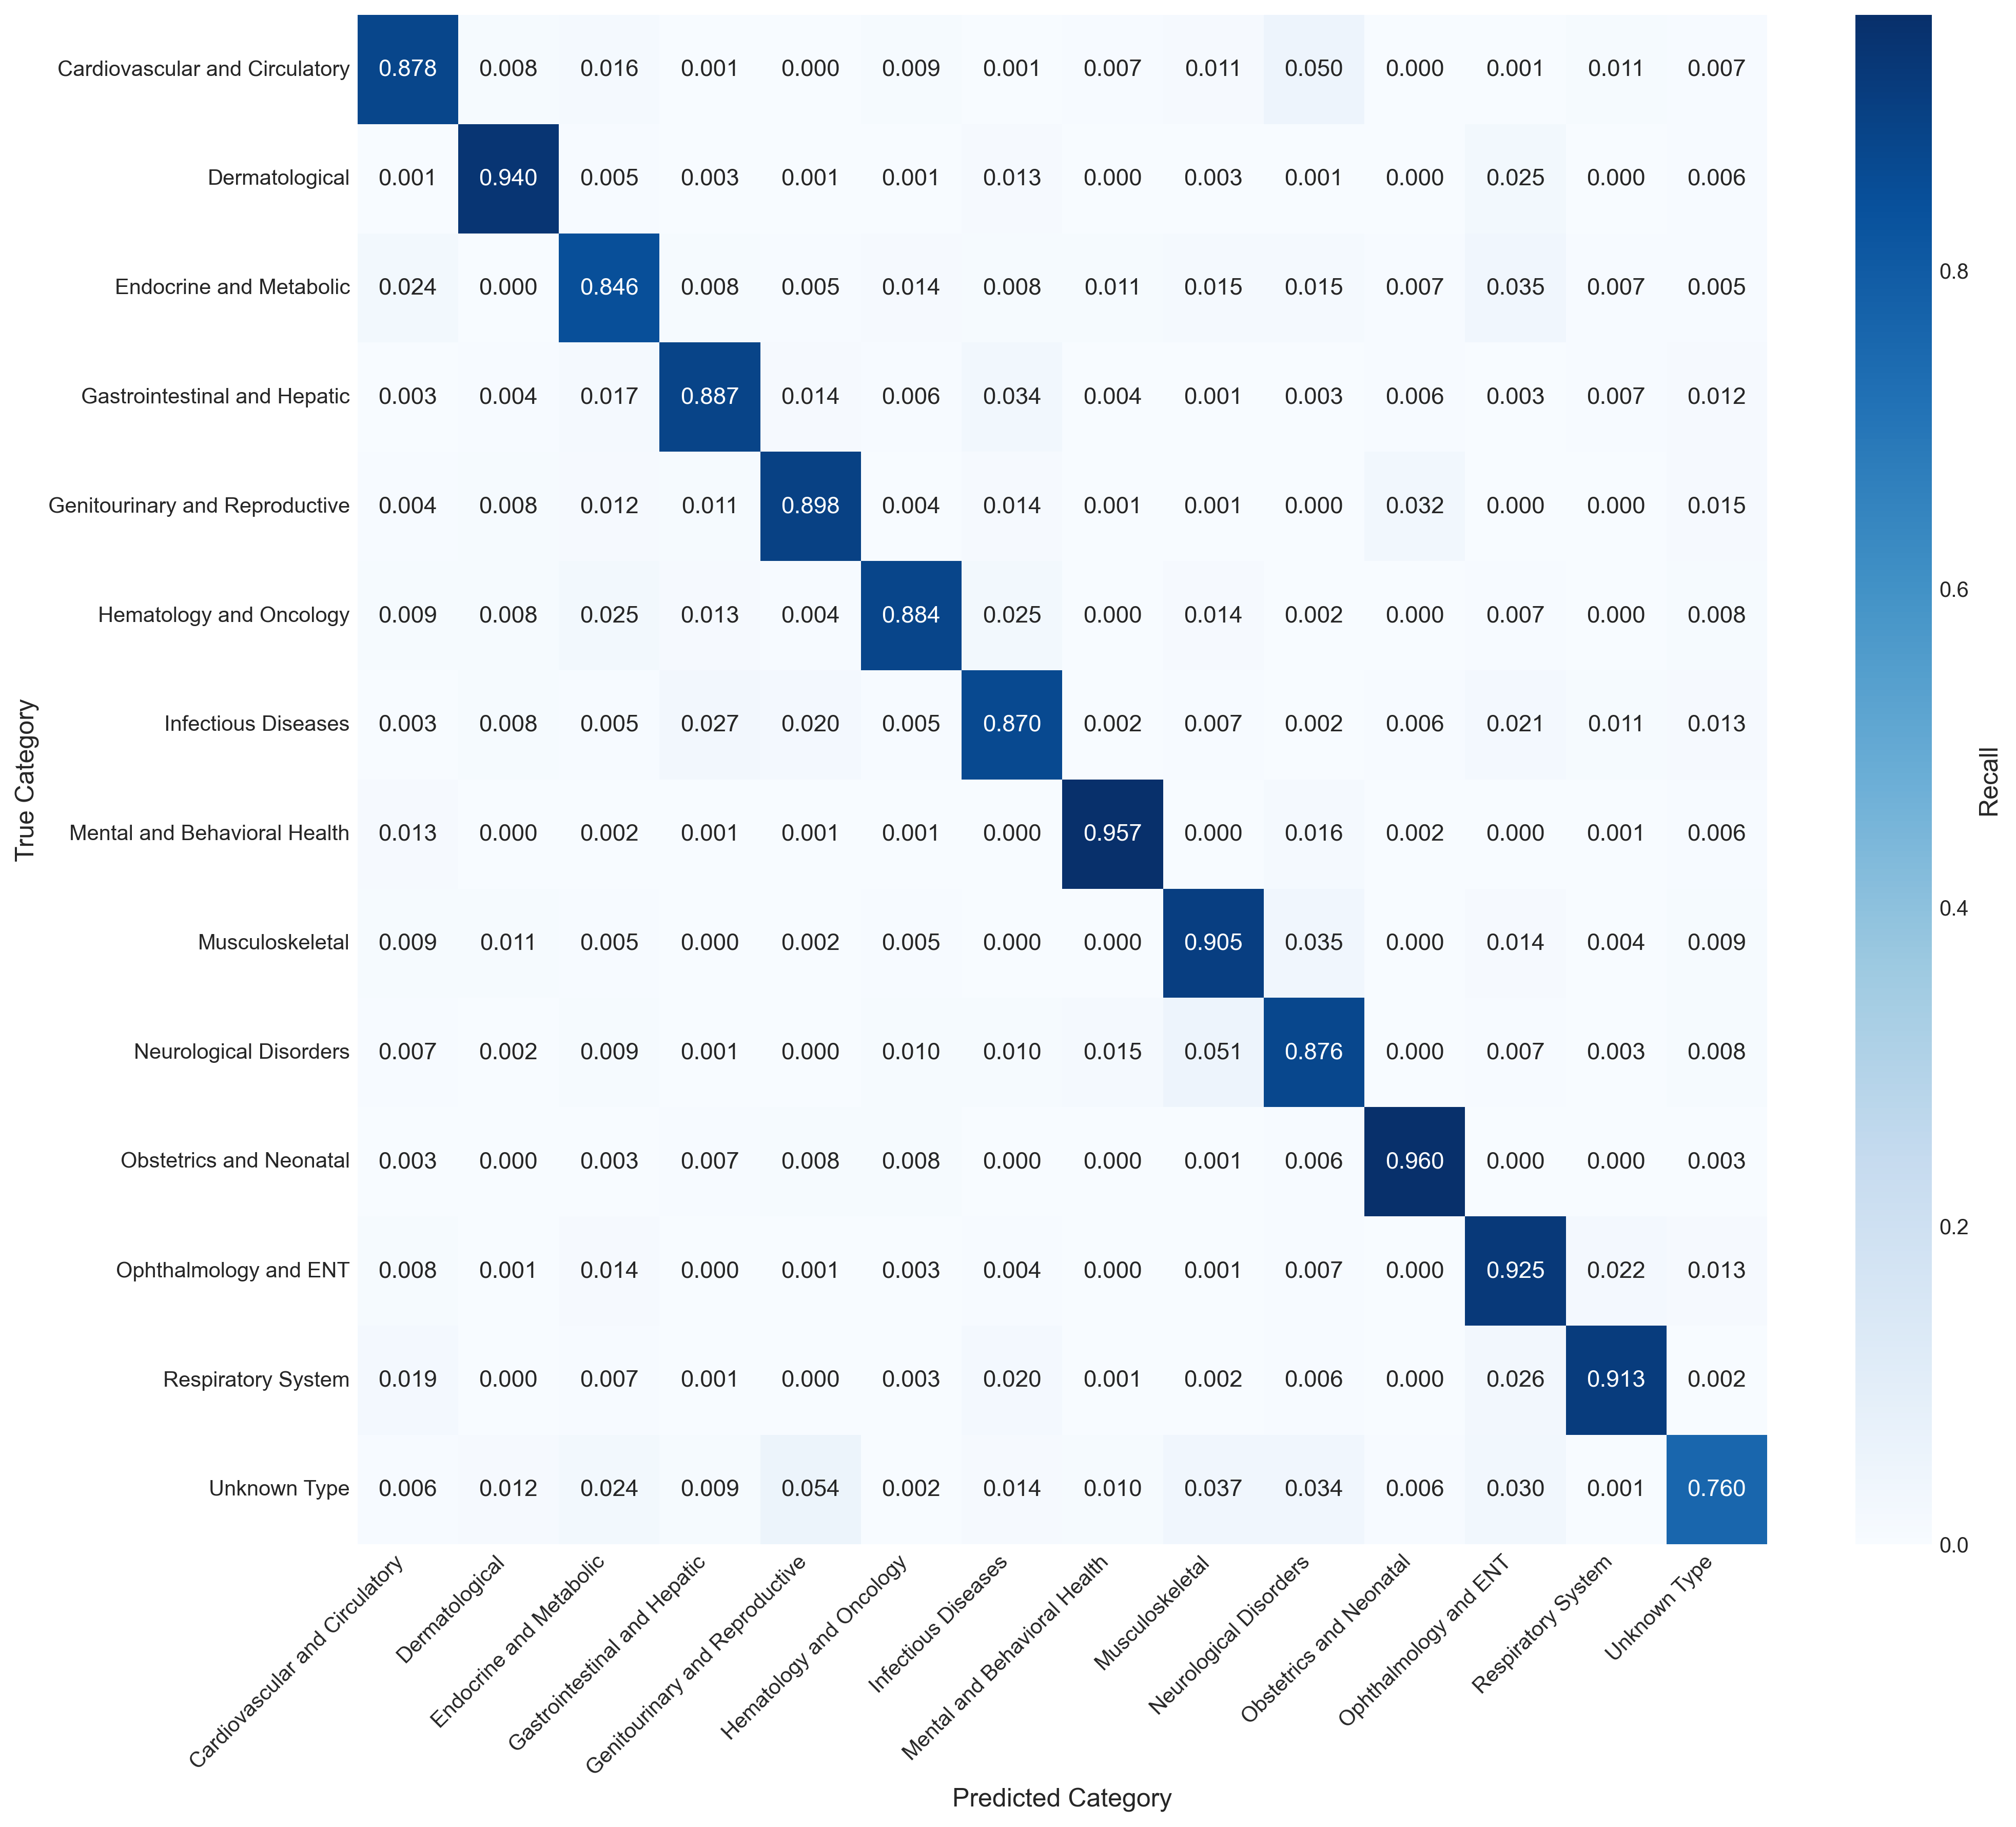

Plotting ROC Curves...


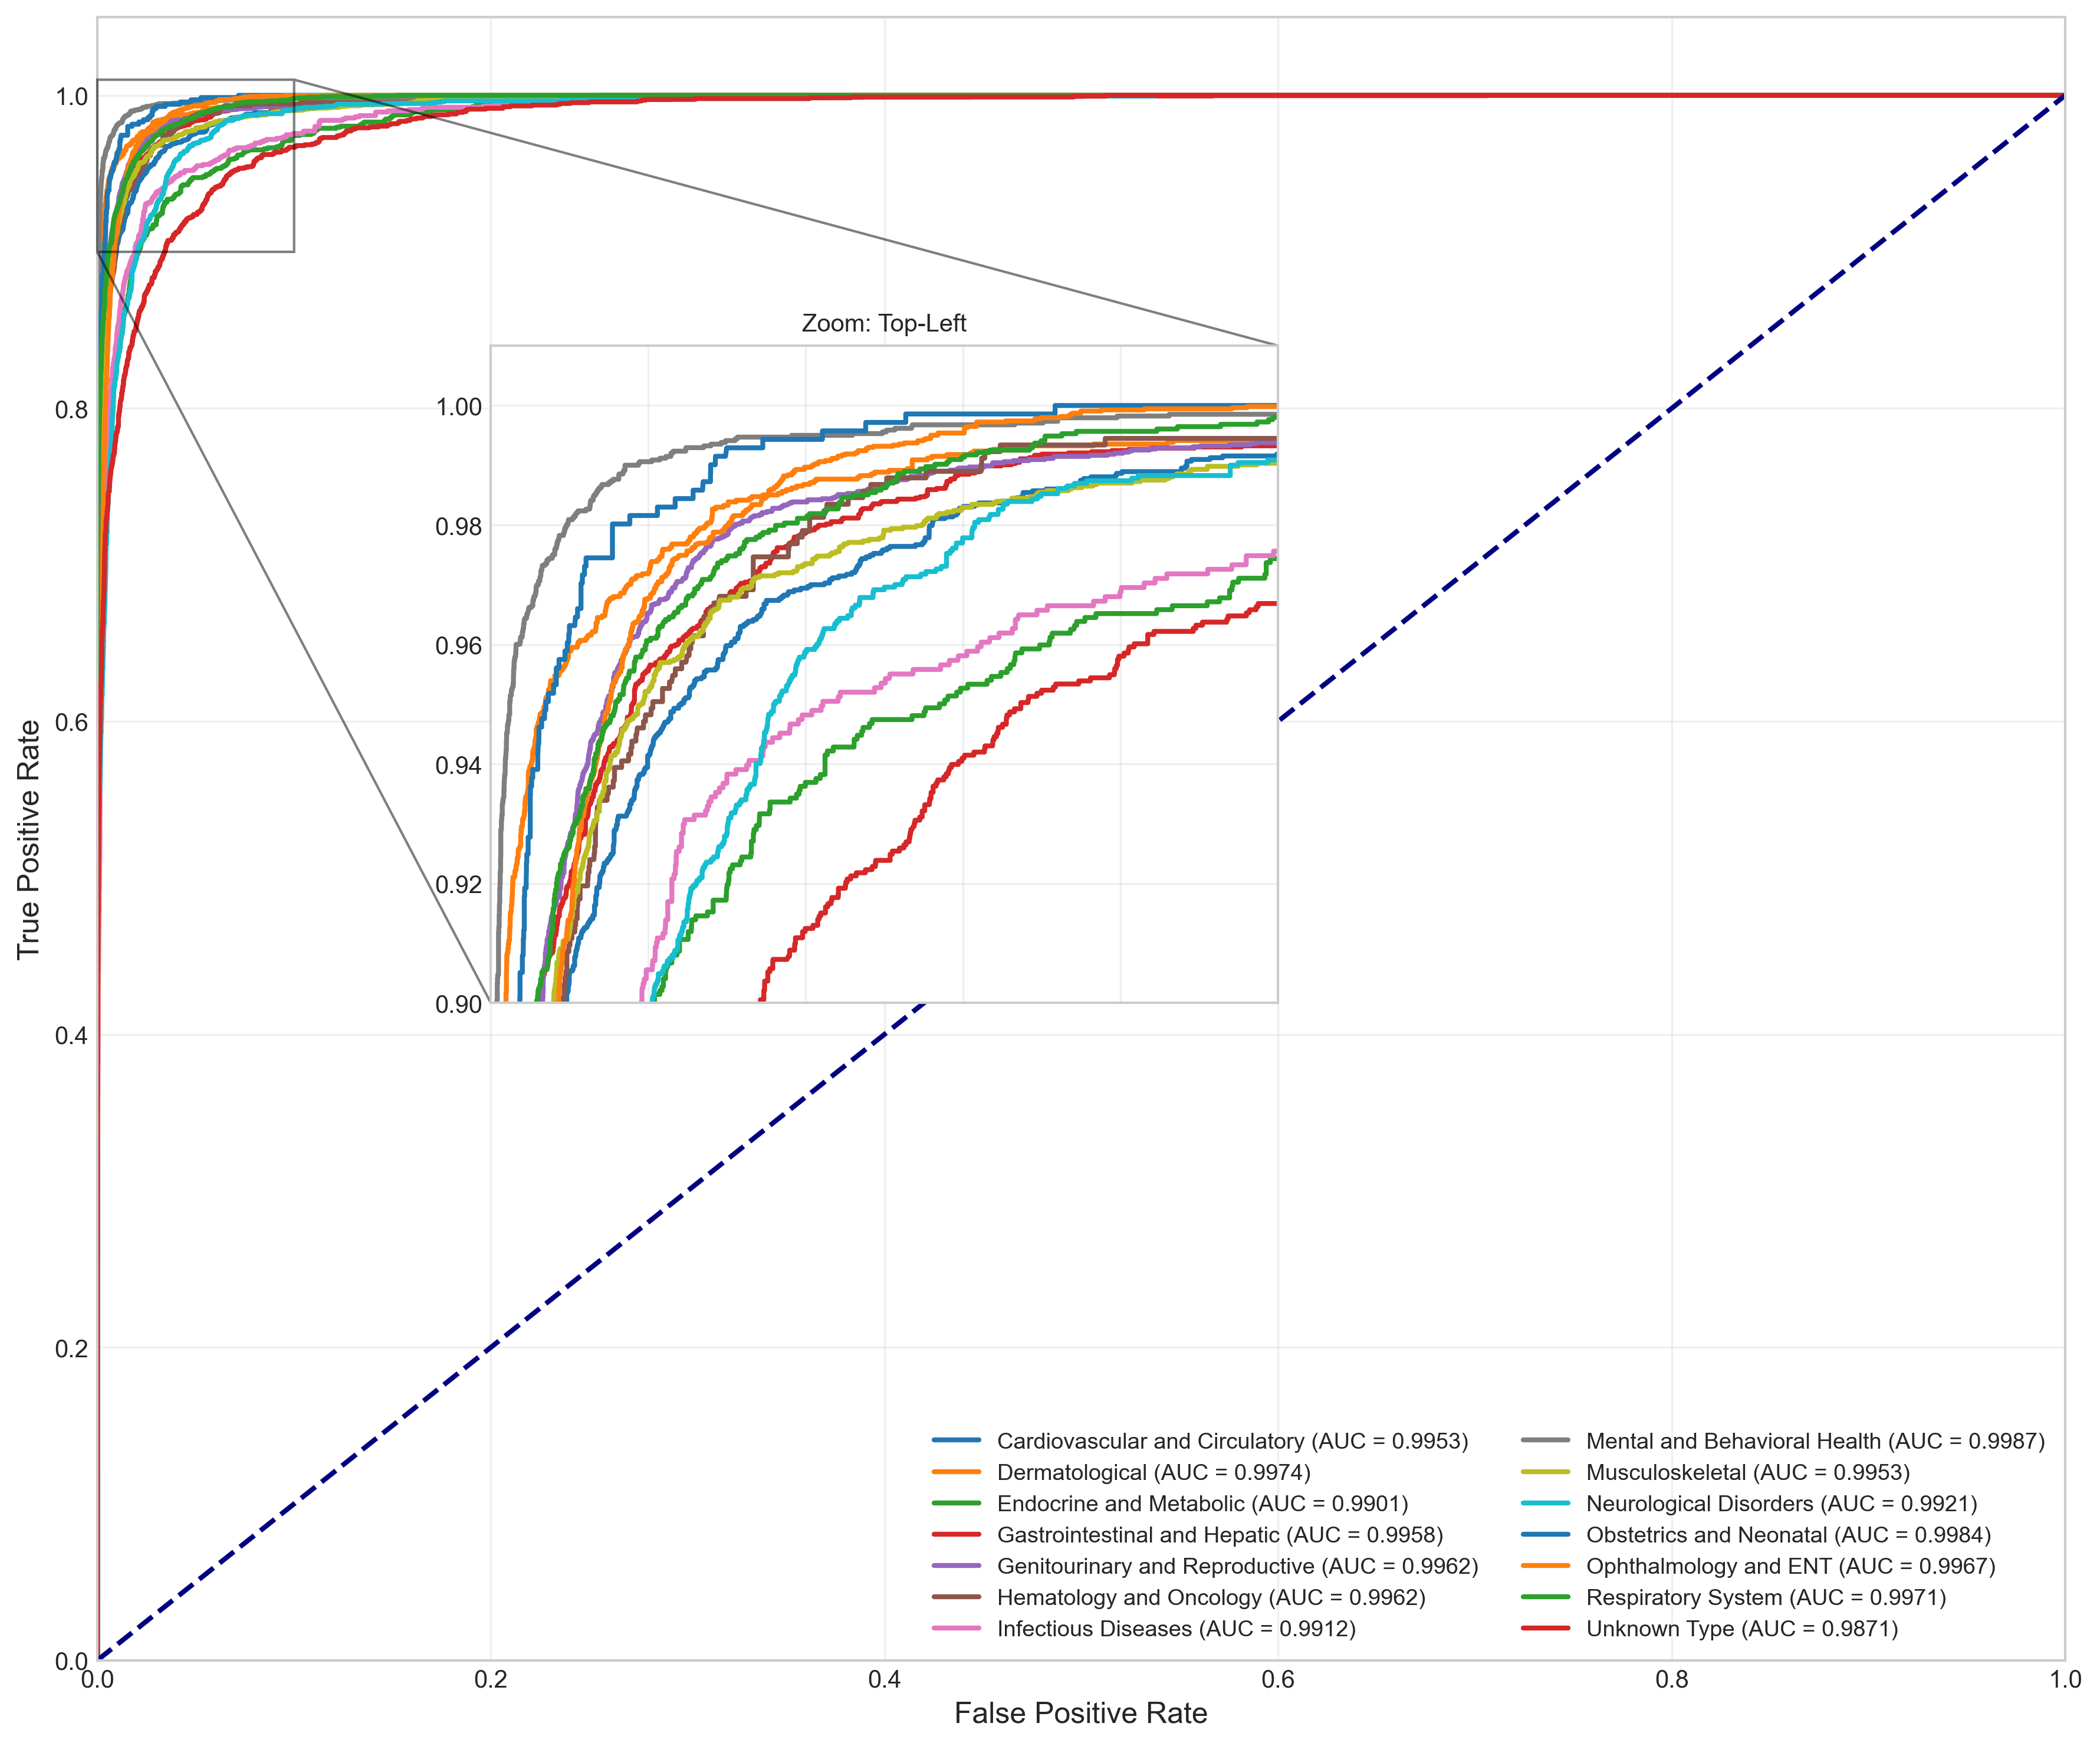

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

from models.architectures.symptom_classifier import SymptomCategoryClassifier 

def generate_category_model_plots():
    print("Loading data for Category Model Evaluation...")
    
    # 1. LOAD RAW DATA (Prevent Leakage)
    data_path = PROJECT_ROOT / "data" / "processed" / "symptoms" / "symptoms_augmented_with_demographics.csv" 
    
    if not data_path.exists():
        print(f"⚠️ Raw data not found at {data_path}")
        print("Falling back to augmented data...")
        data_path = PROJECT_ROOT / "data" / "processed" / "symptoms" / "symptoms_augmented_with_demographics.csv"
        
    df = pd.read_csv(data_path)
    
    # 2. Setup Data
    # Target is explicitly the CATEGORY
    y = df['disease_category']
    
    # Drop non-features
    non_feat = ['diseases', 'disease_category', 'symptoms', 'age', 'sex', 'age_normalized', 'sex_encoded']
    feats = [c for c in df.columns if c not in non_feat]
    X = df[feats].fillna(0)
    
    # 3. Split Data
    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 4. Train Category Model
    print(f"Training SymptomCategoryClassifier on {len(y.unique())} categories...")
    # Initialize your custom class
    clf = SymptomCategoryClassifier(n_estimators=100) 
    clf.fit(X_train, y_train)
    
    # 5. Predictions
    print("Generating predictions...")
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    # --- FIX IS HERE ---
    # Your class stores labels in .categories, not .classes_
    categories = clf.categories 
    
    # --- PLOT 1: Confusion Matrix ---
    print("Plotting Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred, labels=categories)
    # display(cm)
    
    # Normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)

    plt.figure(figsize=(14, 12))
    sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues', 
                xticklabels=categories, yticklabels=categories,
                cbar_kws={'label': 'Recall'})
    # plt.title('Figure 10: Confusion Matrix (Category Model)')
    plt.ylabel('True Category')
    plt.xlabel('Predicted Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig10_category_model_cm.png")
    plt.show()
    
    # --- PLOT 2: ROC Curves ---
    print("Plotting ROC Curves...")
    
    lb = LabelBinarizer()
    lb.fit(categories)
    y_test_bin = lb.transform(y_test)
    
    plt.figure(figsize=(12, 10))
    
    # 1. MAIN PLOT LOOP
    for i, category in enumerate(categories):
        if i < y_test_bin.shape[1]:
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{category} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Figure 11: ROC Curves (Category Model)')
    plt.legend(loc="lower right", fontsize='small', ncol=2)
    plt.grid(True, alpha=0.3)

    # 2. INSET (ZOOM) PLOT - MUST BE DONE HERE
    # Create the inset axes inside the main plot
    ax_ins = plt.gca().inset_axes([0.2, 0.4, 0.4, 0.4]) 
    
    # Re-plot the curves onto this tiny inset axes
    for i, category in enumerate(categories):
        if i < y_test_bin.shape[1]:
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            ax_ins.plot(fpr, tpr, lw=2)
            
    # Zoom settings for the inset
    ax_ins.set_xlim(0.0, 0.1)  # Focus on FPR 0.0 to 0.1
    ax_ins.set_ylim(0.9, 1.01) # Focus on TPR 0.9 to 1.0
    ax_ins.set_title("Zoom: Top-Left", fontsize=10)
    ax_ins.grid(True, alpha=0.3)
    # Remove ticks on inset to reduce clutter (optional but recommended)
    ax_ins.set_xticklabels([]) 
    
    # Draw the connecting lines from main plot to inset
    plt.gca().indicate_inset_zoom(ax_ins, edgecolor="black")
    
    # 3. SAVE AND SHOW (ONLY ONCE AT THE END)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig11_roc_curves_zoomed.png")
    plt.show()

generate_category_model_plots()

## 9. Class Imbalance Defense

Training LightGBM on FULL dataset for imbalance visualization...
Loaded 207518 total records
Using 622 diseases (filtered out 5 single-sample diseases)
Disease sample range: 1 to 1219
Splitting data (80/20)...
Training on 166010 samples, 456 features...
This may take a few minutes...
Training SymptomDiseaseClassifier for category 'all' with shape (141108, 456)
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 3.35587
Generating predictions...
Plotting 621 diseases...
Sample range: 3 - 975


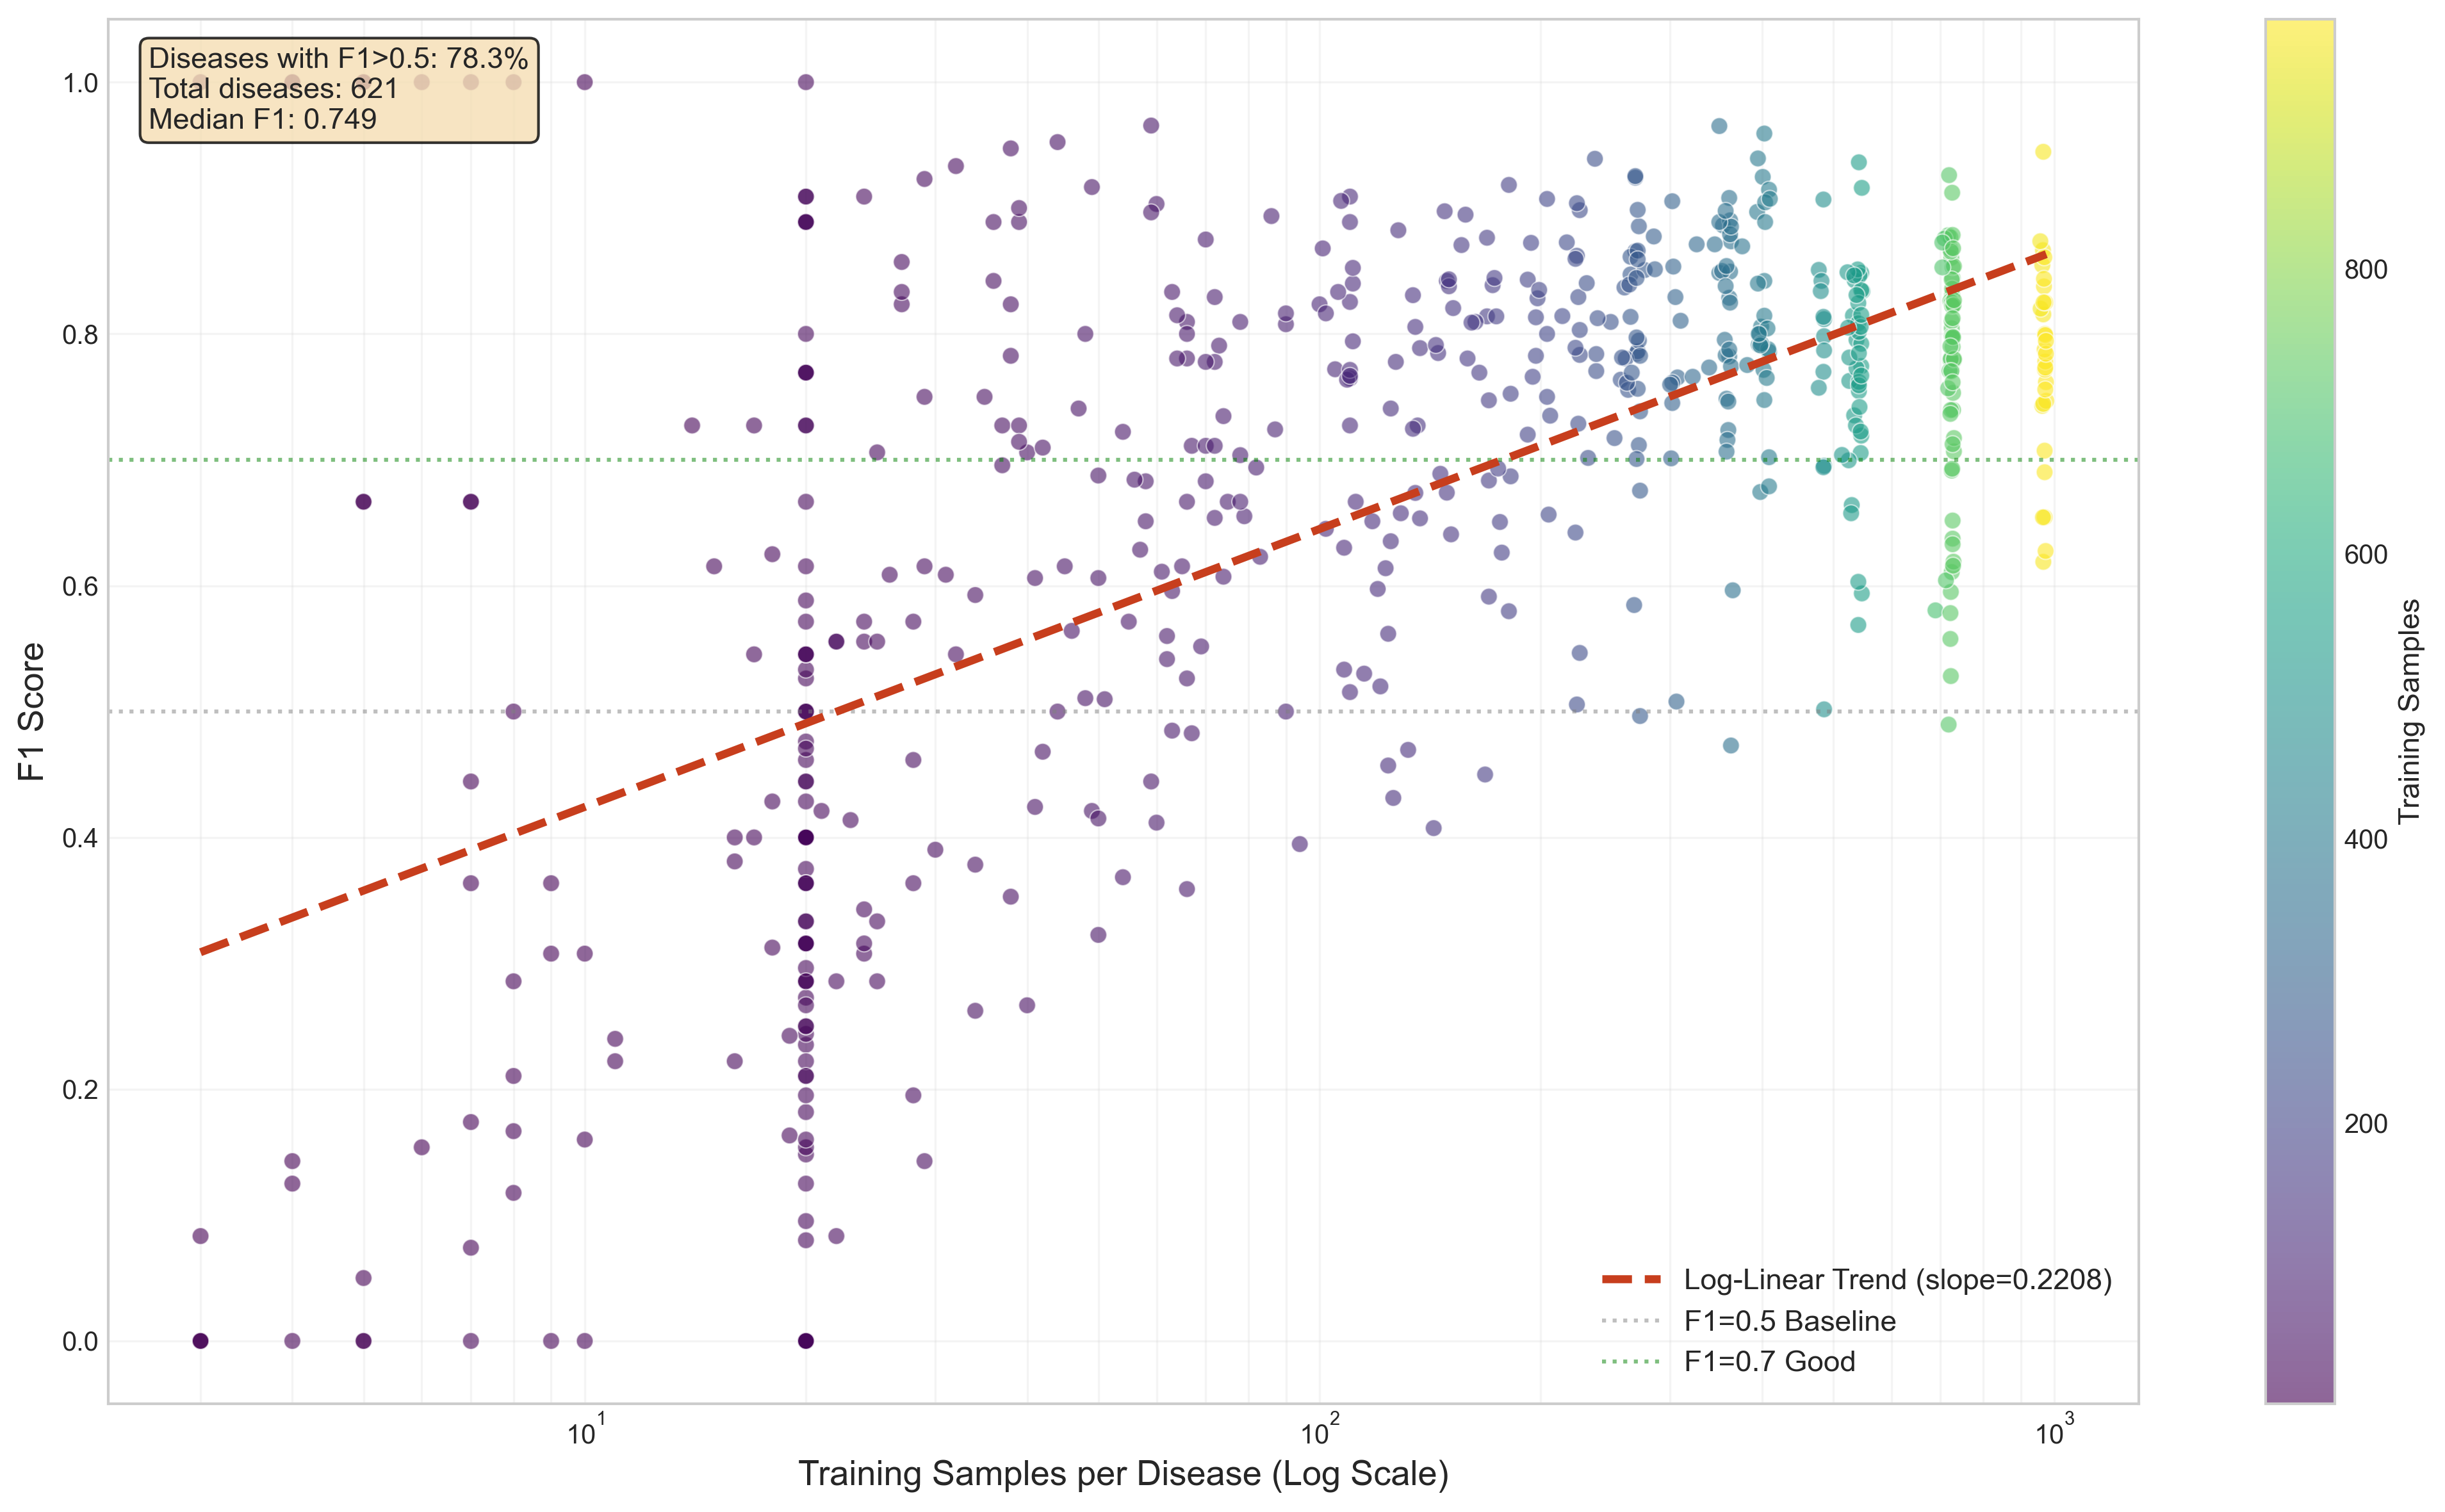

✓ Full dataset plot saved successfully!
✓ Covered sample range: 3 to 975


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from models.architectures.symptom_classifier import SymptomDiseaseClassifier

def plot_real_imbalance_defense_full():
    """
    Full dataset training to demonstrate class imbalance handling
    Uses all available data to show performance across the full spectrum
    """
    import warnings
    warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
    
    print("Training LightGBM on FULL dataset for imbalance visualization...")
    
    # Load FULL data
    data_path = PROJECT_ROOT / "data" / "processed" / "symptoms" / "symptoms_augmented_with_demographics.csv"
    df = pd.read_csv(data_path)
    
    print(f"Loaded {len(df)} total records")
    
    # Only filter out diseases with just 1 sample (can't stratify with 1)
    disease_counts = df['diseases'].value_counts()
    valid_diseases = disease_counts[disease_counts >= 2].index
    df_filtered = df[df['diseases'].isin(valid_diseases)].copy()
    
    print(f"Using {len(valid_diseases)} diseases (filtered out {len(disease_counts) - len(valid_diseases)} single-sample diseases)")
    print(f"Disease sample range: {disease_counts.min()} to {disease_counts.max()}")
    
    # Prepare features - USE ALL DATA
    y = df_filtered['diseases']
    non_feat = ['diseases', 'disease_category', 'symptoms', 'age', 'sex']
    feats = [c for c in df_filtered.columns if c not in non_feat]
    X = df_filtered[feats].fillna(0)
    
    # Split with stratification
    print("Splitting data (80/20)...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train with early stopping to keep it reasonably fast
    from models.architectures.symptom_classifier import SymptomDiseaseClassifier
    
    clf = SymptomDiseaseClassifier(
        category="all",
        n_estimators=100,  # Moderate number
        learning_rate=0.1,
        max_depth=7,
        stopping_rounds=10
    )
    
    print(f"Training on {X_train.shape[0]} samples, {X_train.shape[1]} features...")
    print("This may take a few minutes...")
    
    # Use validation set for early stopping
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.15, random_state=42, stratify=y_train
    )
    
    clf.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])

    # Predict
    print("Generating predictions...")
    y_pred = clf.predict(X_test)
    
    # Calculate metrics per disease
    from sklearn.metrics import classification_report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    plot_samples = []
    plot_f1 = []
    
    # Collect data for all diseases in training set
    unique_train_classes = np.unique(y_train)
    
    for disease in unique_train_classes:
        n_train = (y_train == disease).sum()
        key = str(disease)
        
        # Include even if test support is low/zero (shows full spectrum)
        if key in report:
            plot_samples.append(n_train)
            plot_f1.append(report[key]['f1-score'])

    # Convert to arrays
    plot_samples = np.array(plot_samples)
    plot_f1 = np.array(plot_f1)
    
    print(f"Plotting {len(plot_samples)} diseases...")
    print(f"Sample range: {plot_samples.min():.0f} - {plot_samples.max():.0f}")
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Color by sample size for better visualization
    scatter = ax.scatter(plot_samples, plot_f1, alpha=0.6, c=plot_samples, 
                        cmap='viridis', s=40, edgecolors='white', linewidth=0.5)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Training Samples', fontsize=11)
    
    # Fit and plot trend line
    if len(plot_samples) > 1:
        # Use robust fitting with log transform
        valid_mask = (plot_samples > 0) & (plot_f1 >= 0)
        if valid_mask.sum() > 1:
            m, b = np.polyfit(np.log10(plot_samples[valid_mask]), 
                            plot_f1[valid_mask], 1)
            x_fit = np.logspace(np.log10(plot_samples.min()), 
                               np.log10(plot_samples.max()), 100)
            y_fit = m * np.log10(x_fit) + b
            
            ax.plot(x_fit, y_fit, color='#C73E1D', linestyle='--', 
                   linewidth=3, label=f'Log-Linear Trend (slope={m:.4f})', 
                   zorder=10)
    
    # Add reference lines
    ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, label='F1=0.5 Baseline')
    ax.axhline(y=0.7, color='green', linestyle=':', alpha=0.5, label='F1=0.7 Good')
    
    # Annotate key statistics
    high_perf_pct = (plot_f1 > 0.5).sum() / len(plot_f1) * 100
    ax.text(0.02, 0.98, 
            f'Diseases with F1>0.5: {high_perf_pct:.1f}%\n'
            f'Total diseases: {len(plot_samples)}\n'
            f'Median F1: {np.median(plot_f1):.3f}',
            transform=ax.transAxes, fontsize=11,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xscale('log')
    ax.set_xlabel('Training Samples per Disease (Log Scale)', fontsize=13)
    ax.set_ylabel('F1 Score', fontsize=13)
    ax.set_ylim(-0.05, 1.05)
    # ax.set_title('Figure 6: Model Robustness Across Class Imbalance (Full Dataset)', 
                # fontsize=15, pad=15)
    ax.legend(loc='lower right', fontsize=11)
    ax.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig6_imbalance_defense_full.png", dpi=300)
    plt.savefig(FIGURES_DIR / "fig6_imbalance_defense_full.svg")
    plt.show()
    
    print("✓ Full dataset plot saved successfully!")
    print(f"✓ Covered sample range: {plot_samples.min():.0f} to {plot_samples.max():.0f}")

plot_real_imbalance_defense_full()

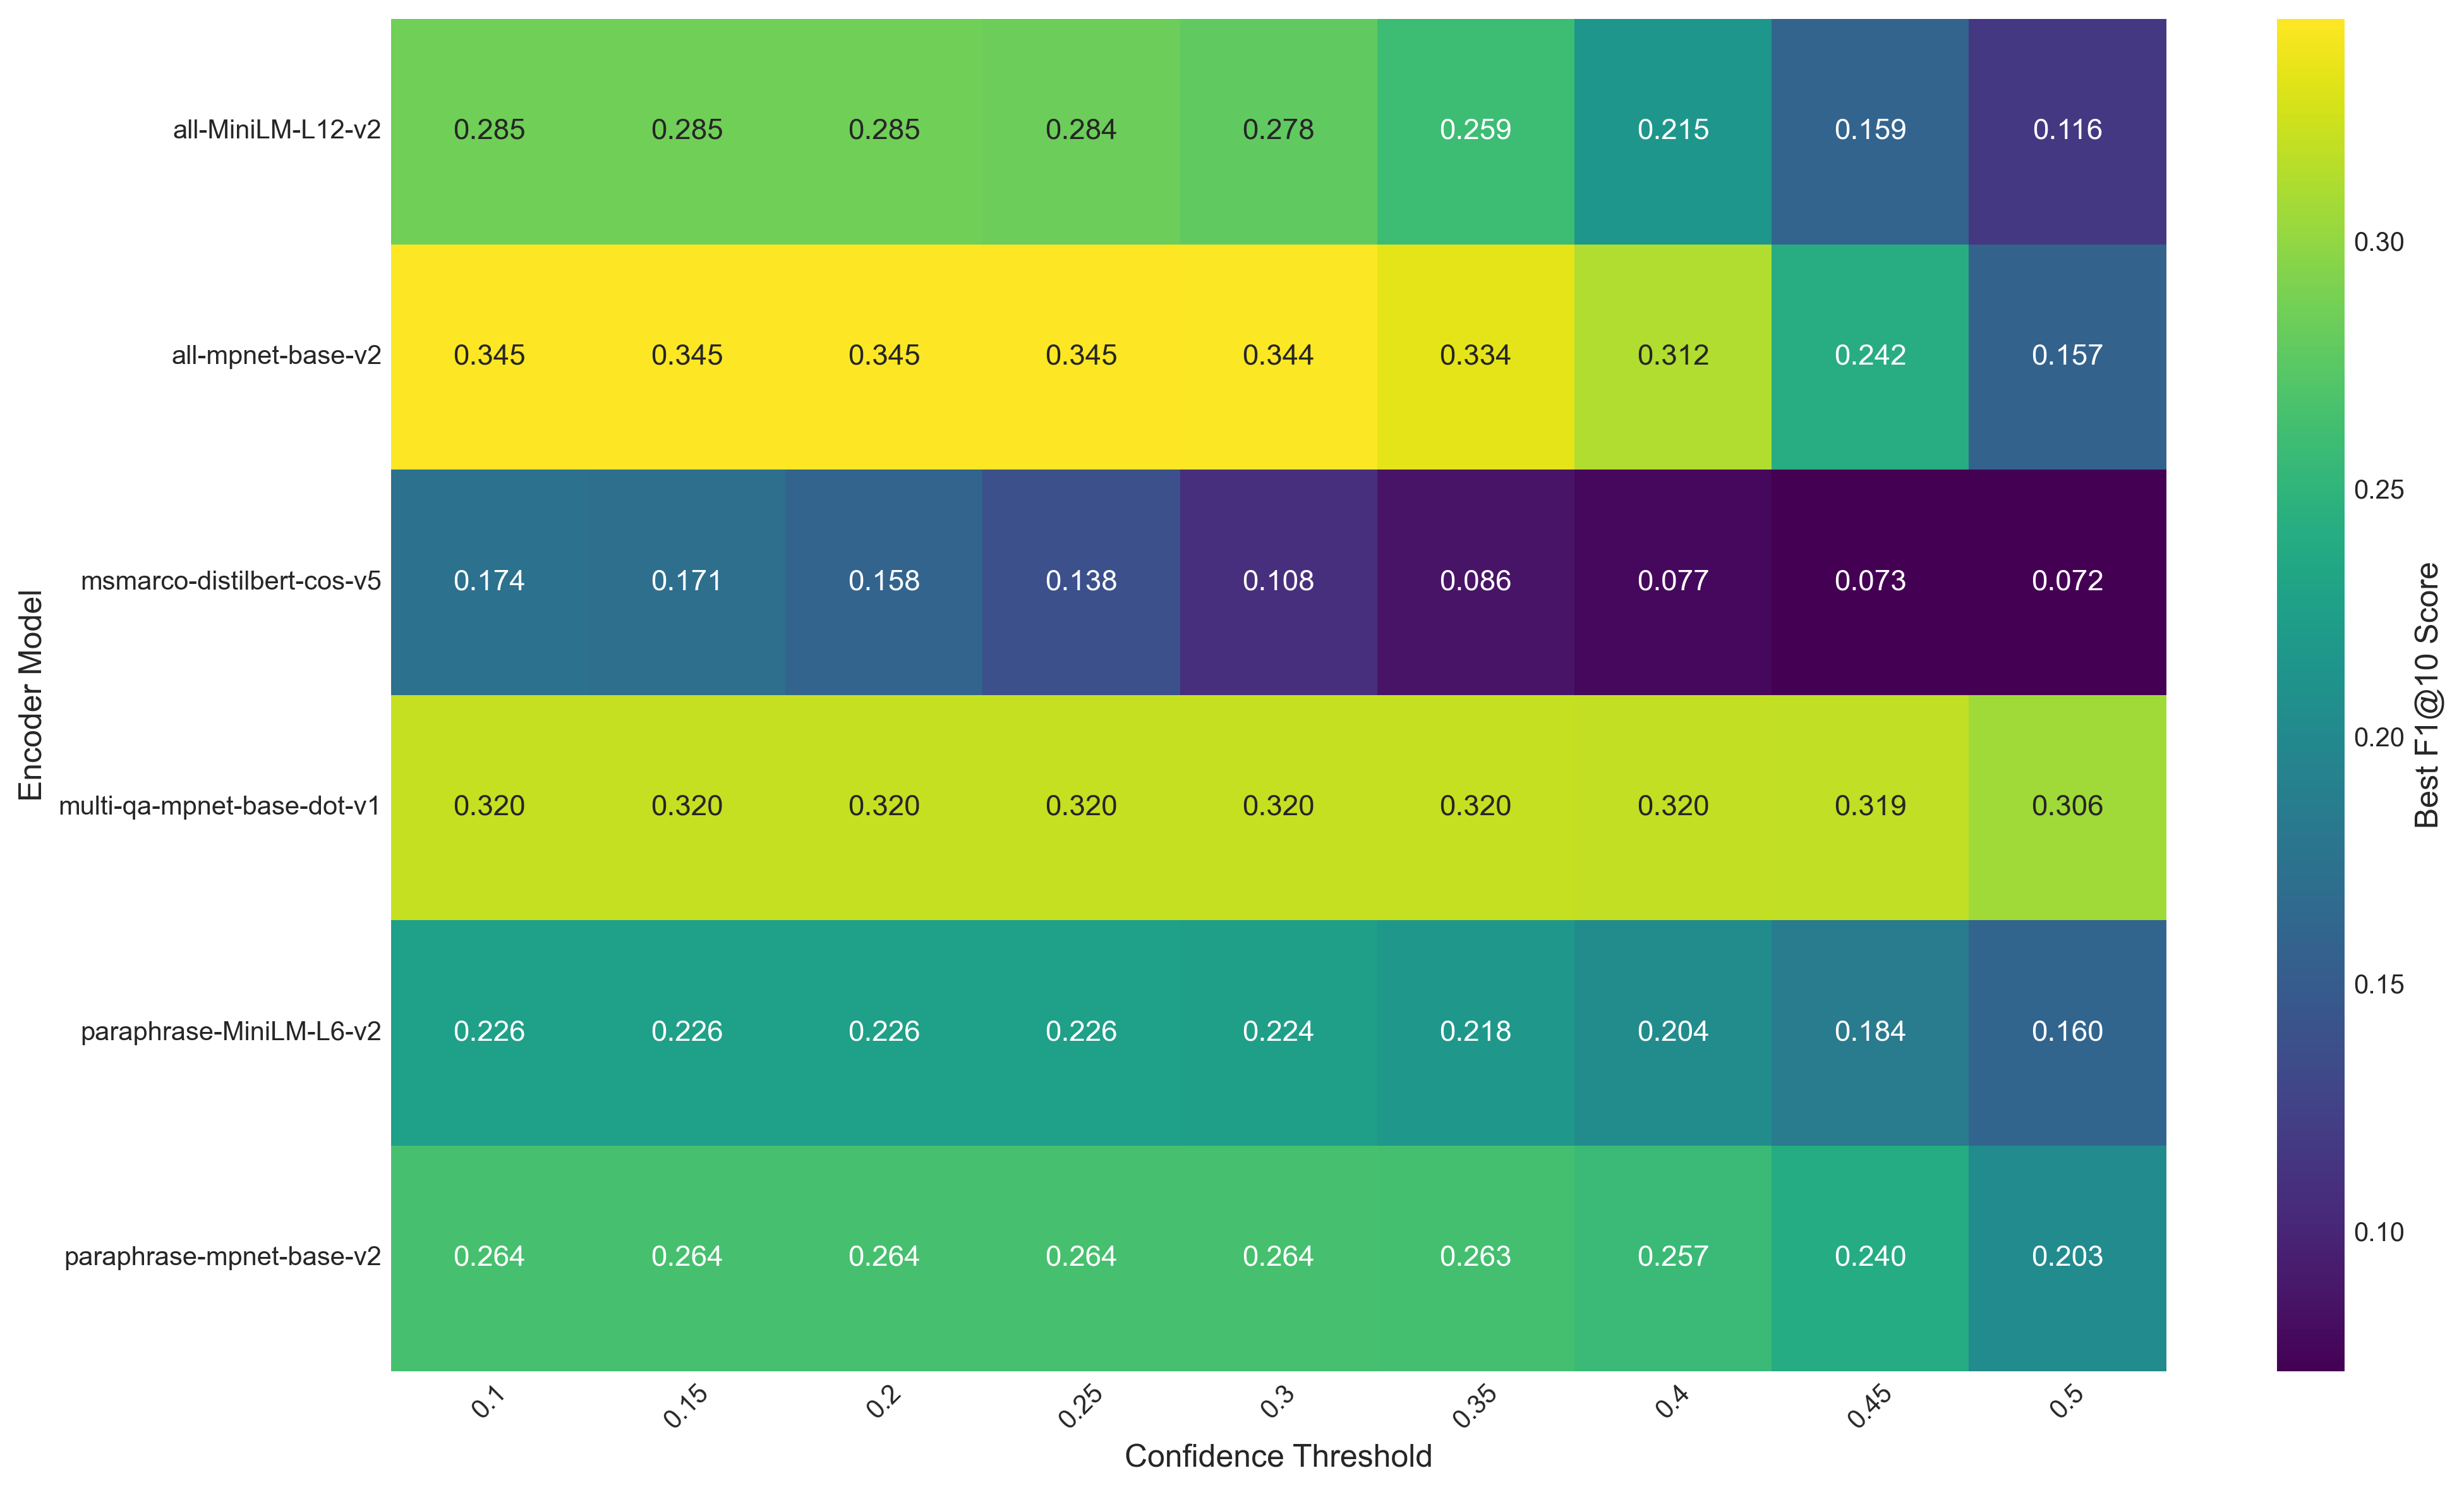

C:\Users\henry\AppData\Local\Temp\ipykernel_11192\2847557700.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='short_model', y='F1@10', palette='Set3')


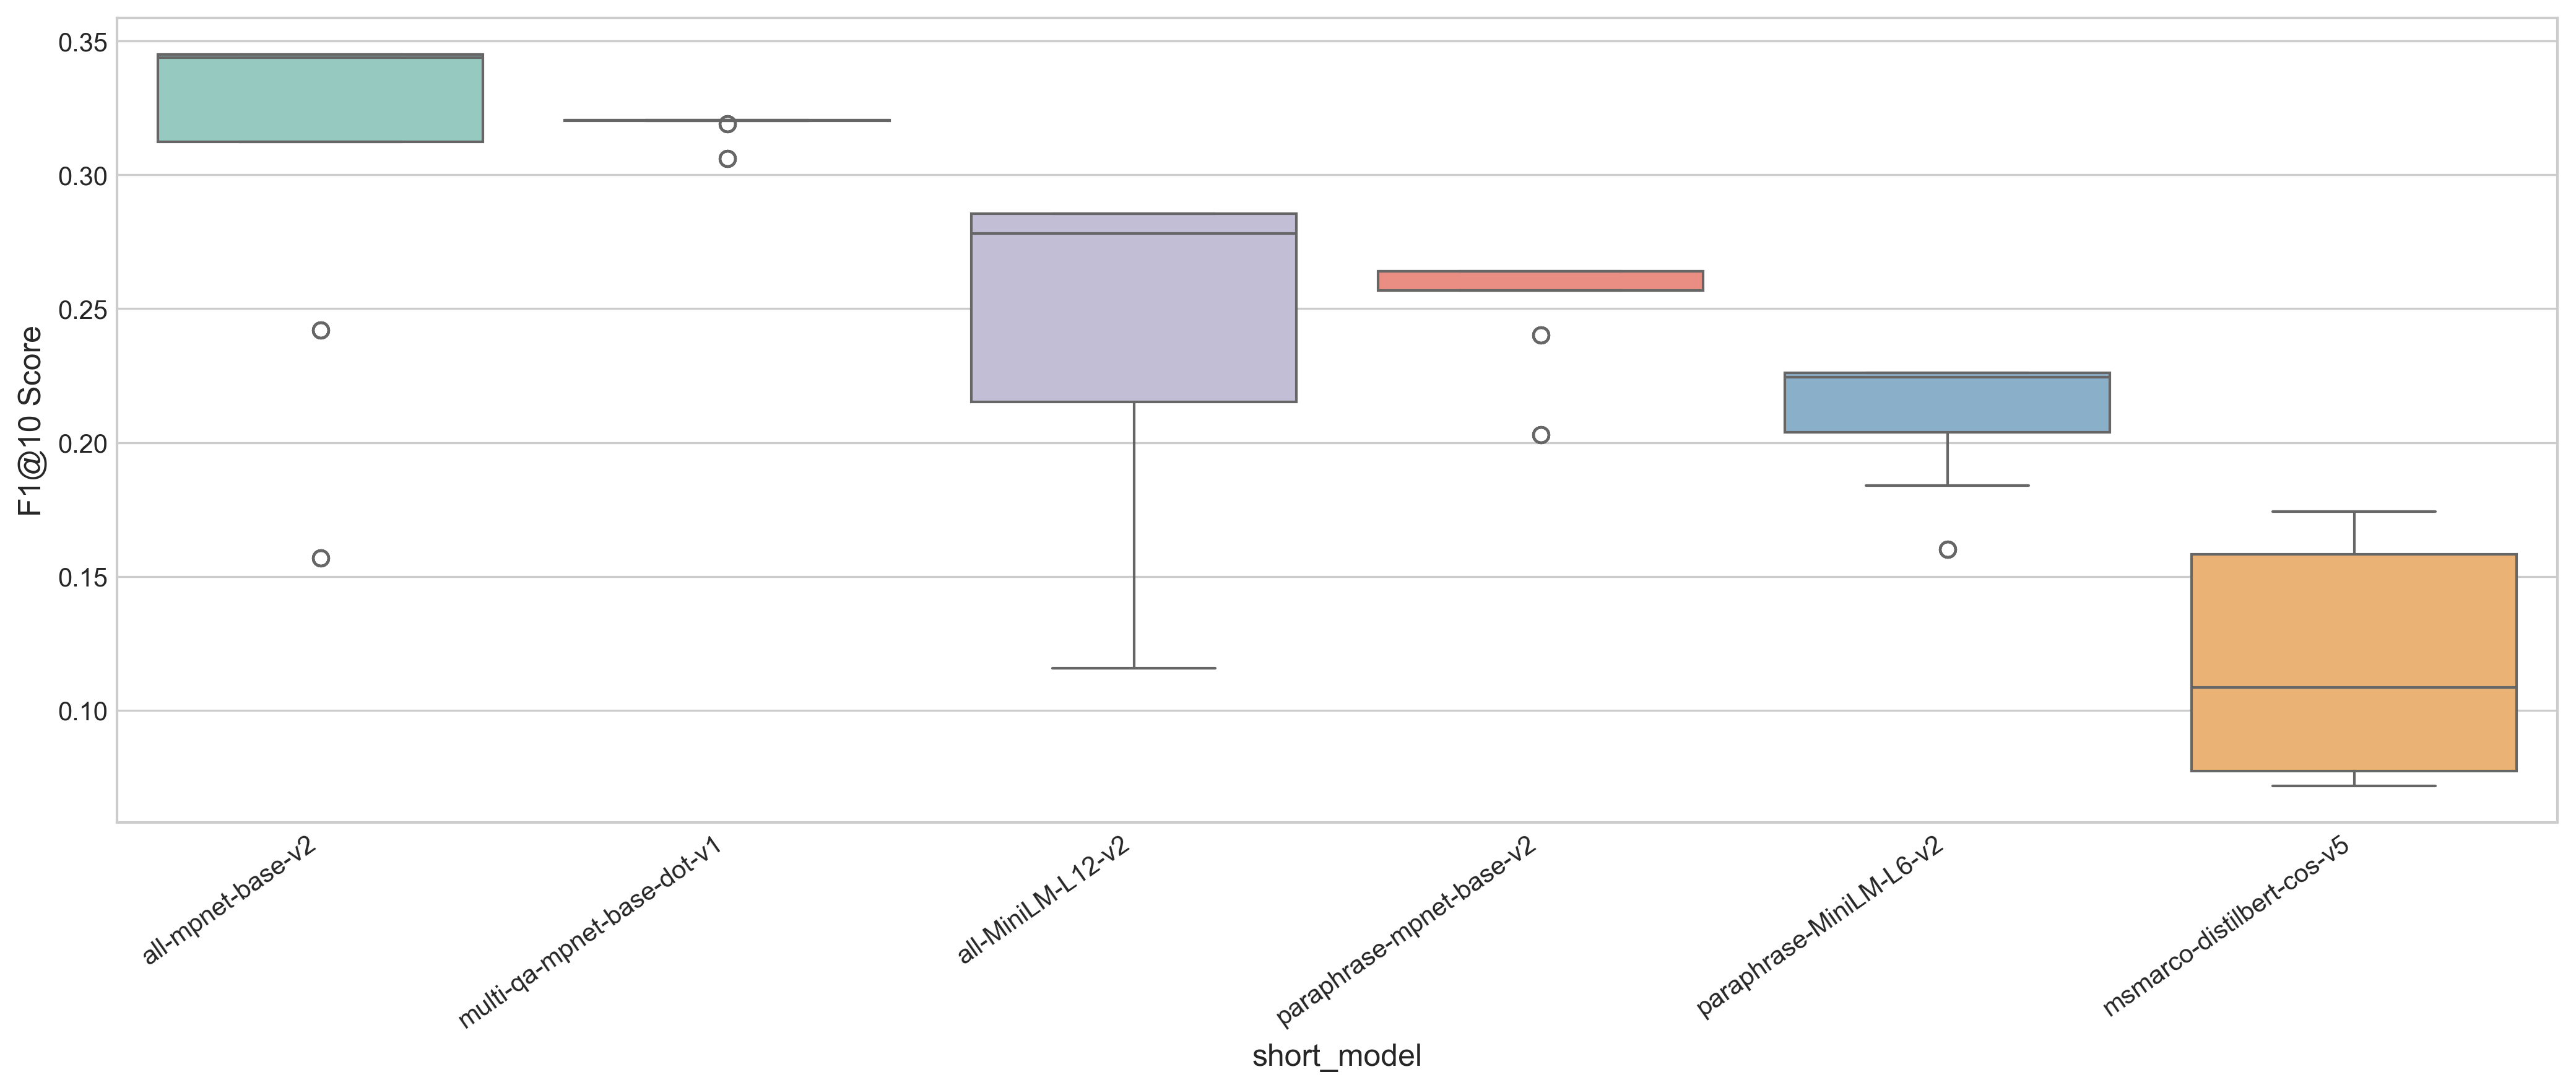

In [21]:
def plot_full_grid_search_fixed():
    # Extract grid search data
    grid_data = rigorous_results.get('full_grid_search', {})
    
    # Robust extraction
    if isinstance(grid_data, dict) and 'full_grid_search' in grid_data:
        results = grid_data['full_grid_search']
    elif isinstance(grid_data, list):
        results = grid_data
    else:
        print("Grid search data structure not found.")
        return

    if not results:
        print("No grid search results available.")
        return
        
    df = pd.DataFrame(results)
    
    # --- FIX 1: Remove the character limit ([:15]) ---
    # Optional: Use a mapping dict for cleaner, full names
    name_map = {
        'sentence-transformers/all-mpnet-base-v2': 'All-MPNet',
        'sentence-transformers/multi-qa-mpnet-base-dot-v1': 'Multi-QA-MPNet',
        'sentence-transformers/all-MiniLM-L12-v2': 'MiniLM-L12',
        'sentence-transformers/all-MiniLM-L6-v2': 'MiniLM-L6',
        'sentence-transformers/paraphrase-MiniLM-L6-v2': 'Para-MiniLM',
        # Fallback for any others: just remove the prefix
    }
    
    def clean_name(name):
        # Check explicit map first
        if name in name_map:
            return name_map[name]
        # Otherwise just strip the prefix, BUT DO NOT TRUNCATE
        return name.split('/')[-1].replace('sentence-transformers/', '')

    df['short_model'] = df['model'].apply(clean_name)
    
    # --- Plot 1: Heatmap ---
    pivot_df = df.groupby(['short_model', 'threshold'])['F1@10'].max().unstack()
    
    # Increase figure width to accommodate longer names on Y-axis
    plt.figure(figsize=(14, 8)) 
    
    sns.heatmap(pivot_df, annot=True, fmt='.3f', cmap='viridis', 
                cbar_kws={'label': 'Best F1@10 Score'})
    
    # plt.title('Figure 12: Grid Search Performance (Model vs Threshold)')
    plt.ylabel('Encoder Model', fontsize=12)
    plt.xlabel('Confidence Threshold', fontsize=12)
    
    # Ensure Y-labels are horizontal and not cut off
    plt.yticks(rotation=0) 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig12_grid_search_heatmap.png", bbox_inches='tight')
    plt.show()
    
    # --- Plot 2: Boxplot ---
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x='short_model', y='F1@10', palette='Set3')
    # plt.title('Figure 12b: Model Stability')
    
    # Rotate X labels significantly so they don't overlap
    plt.xticks(rotation=35, ha='right')
    plt.ylabel('F1@10 Score')
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "fig12b_grid_search_stability.png", bbox_inches='tight')
    plt.show()

plot_full_grid_search_fixed()